## Graphics for my MEOAPAR ASM 2022 poster
This notebook requires an activation of the `monte_carlo` environment setup 
located in `analysis-rachael/env`
```
conda activate monte_carlo
```

The newest versions of the monte-carlo spills files can be found on Salish at the following location:
`/ocean/rmueller/MIDOSS/spill_files_091921'`

In [1]:
import os
from glob import glob
import pandas as pd
import numpy as np
#import yaml
#from monte_carlo_utils import decimal_divide
from pathlib import Path
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.pyplot as plt
#import matplotlib as mpl
import matplotlib.gridspec as gridspec
import cartopy.crs
from cartopy import feature
import yaml

# predefined naming conventions
import MEOPAR2022_setup as oil

# graphics style
#plt.style.use('seaborn-poster')
plt.style.use(r"/ocean/rmueller/MIDOSS/graphics/MEOPAR_ASM_2022/meopar2022_matplotlibrc.template")


/tmp/ipykernel_960/3334912111.py:21: UserWarning: Style includes a parameter, 'savefig.directory', that is not related to style.  Ignoring
  plt.style.use(r"/ocean/rmueller/MIDOSS/graphics/MEOPAR_ASM_2022/meopar2022_matplotlibrc.template")


## For histogram of tanker tracks

In [2]:
# importing sys
import sys
import geopandas as gpd  
# adding path to midoss_utils, from analysis-rachael/scripts
sys.path.insert(0, '../../../scripts')
from midoss_utils import concat_shp
from monte_carlo_utils import get_DOE_df, get_bin

In [3]:
spills_dir_name = 'spill_files_091921'
# On Salish
data_directory = Path(f'/ocean/rmueller/MIDOSS/{spills_dir_name}')
graphics_directory = Path('/ocean/rmueller/MIDOSS/graphics/MEOPAR_ASM_2022')
# Load Oil Attribution file 
oil_attribution_file = '/data/MIDOSS/marine_transport_data/oil_attribution.yaml'
# create list of spill files to plot/evaluate
#filenames_old = sorted(glob(os.path.join(data_directory_old,"*.csv")))
filenames = sorted(glob(os.path.join(data_directory,"*.csv")))

with open(oil_attribution_file) as file:
        oil_attrs = yaml.load(file, Loader=yaml.Loader)

# conversion factors
gal2m3 = 0.00378541
liter2m3 = 1e-3

### Load 90,000 spills (nine 10,000 spills files)

In [4]:
df={}
for index,fn in enumerate(filenames):
    print(index,fn)
    df[index] = pd.read_csv(fn)
    # rename lagrangian files as oil types (for plotting)
    df[index]['Lagrangian_template'] = df[index]['Lagrangian_template'].replace(
         oil.fnames, oil.labels
    )
    if index == 0:
        df_combined = df[index].copy()
    else:
        df_combined = pd.concat([df_combined, df[index]])

0 /ocean/rmueller/MIDOSS/spill_files_091921/SalishSea_oil_spills_1.csv
1 /ocean/rmueller/MIDOSS/spill_files_091921/SalishSea_oil_spills_2.csv
2 /ocean/rmueller/MIDOSS/spill_files_091921/SalishSea_oil_spills_3.csv
3 /ocean/rmueller/MIDOSS/spill_files_091921/SalishSea_oil_spills_4.csv
4 /ocean/rmueller/MIDOSS/spill_files_091921/SalishSea_oil_spills_5.csv
5 /ocean/rmueller/MIDOSS/spill_files_091921/SalishSea_oil_spills_6.csv
6 /ocean/rmueller/MIDOSS/spill_files_091921/SalishSea_oil_spills_7.csv
7 /ocean/rmueller/MIDOSS/spill_files_091921/SalishSea_oil_spills_8.csv
8 /ocean/rmueller/MIDOSS/spill_files_091921/SalishSea_oil_spills_9.csv


In [5]:
df[3][['spill_volume','Lagrangian_template']].groupby('Lagrangian_template').sum()

,spill_volume
Lagrangian_template,
ANS,5.664997e+08
Bunker-C,1.058616e+09
Diesel,7.224731e+08
Dilbit,1.250000e+06
Gasoline,2.095766e+08
Jet Fuel,1.310031e+08
Other,1.228995e+08


In [6]:
# combine all files into one dataframe
plot_df = df[0][['spill_volume','Lagrangian_template']].groupby('Lagrangian_template').sum()
plot_df = plot_df.rename(columns={'spill_volume':0}) 
for index in range(1,len(filenames)):
    plot_df[index]=df[index][['spill_volume','Lagrangian_template']].groupby('Lagrangian_template').sum()

In [7]:
plot_df = plot_df.reindex(oil.labels)
# order the 4th column to show first
c = plot_df.columns
plot_df[[c[0], c[3]]] = plot_df[[c[3], c[0]]]
plot_df

,0,1,2,3,4,5,6,7,8
Lagrangian_template,,,,,,,,,
ANS,5.664997e+08,4.580198e+08,5.740982e+08,3.989567e+08,7.743527e+08,3.712767e+08,7.684448e+08,3.358490e+08,6.431348e+08
Bunker-C,1.058616e+09,1.062285e+09,1.108077e+09,1.041574e+09,1.042147e+09,1.010882e+09,1.134923e+09,1.167175e+09,1.097501e+09
Dilbit,1.250000e+06,2.318000e+07,9.882000e+07,4.053403e+07,8.966856e+07,4.905081e+07,7.783256e+07,5.866740e+07,1.708000e+07
Diesel,7.224731e+08,9.053378e+08,8.502411e+08,7.349026e+08,6.644434e+08,7.363371e+08,7.366750e+08,8.574557e+08,9.985479e+08
Gasoline,2.095766e+08,4.208539e+08,3.339501e+08,1.922510e+08,2.574210e+08,3.573719e+08,2.580917e+08,1.898333e+08,2.512536e+08
Jet Fuel,1.310031e+08,7.332830e+07,7.110522e+07,1.853786e+07,6.577042e+07,6.902465e+07,8.127753e+07,1.068080e+08,9.689354e+07
Other,1.228995e+08,2.787284e+08,8.048722e+07,1.450210e+08,2.115801e+08,1.168451e+08,1.591972e+08,1.520739e+08,2.121942e+08


## Plot spill volume by oil types

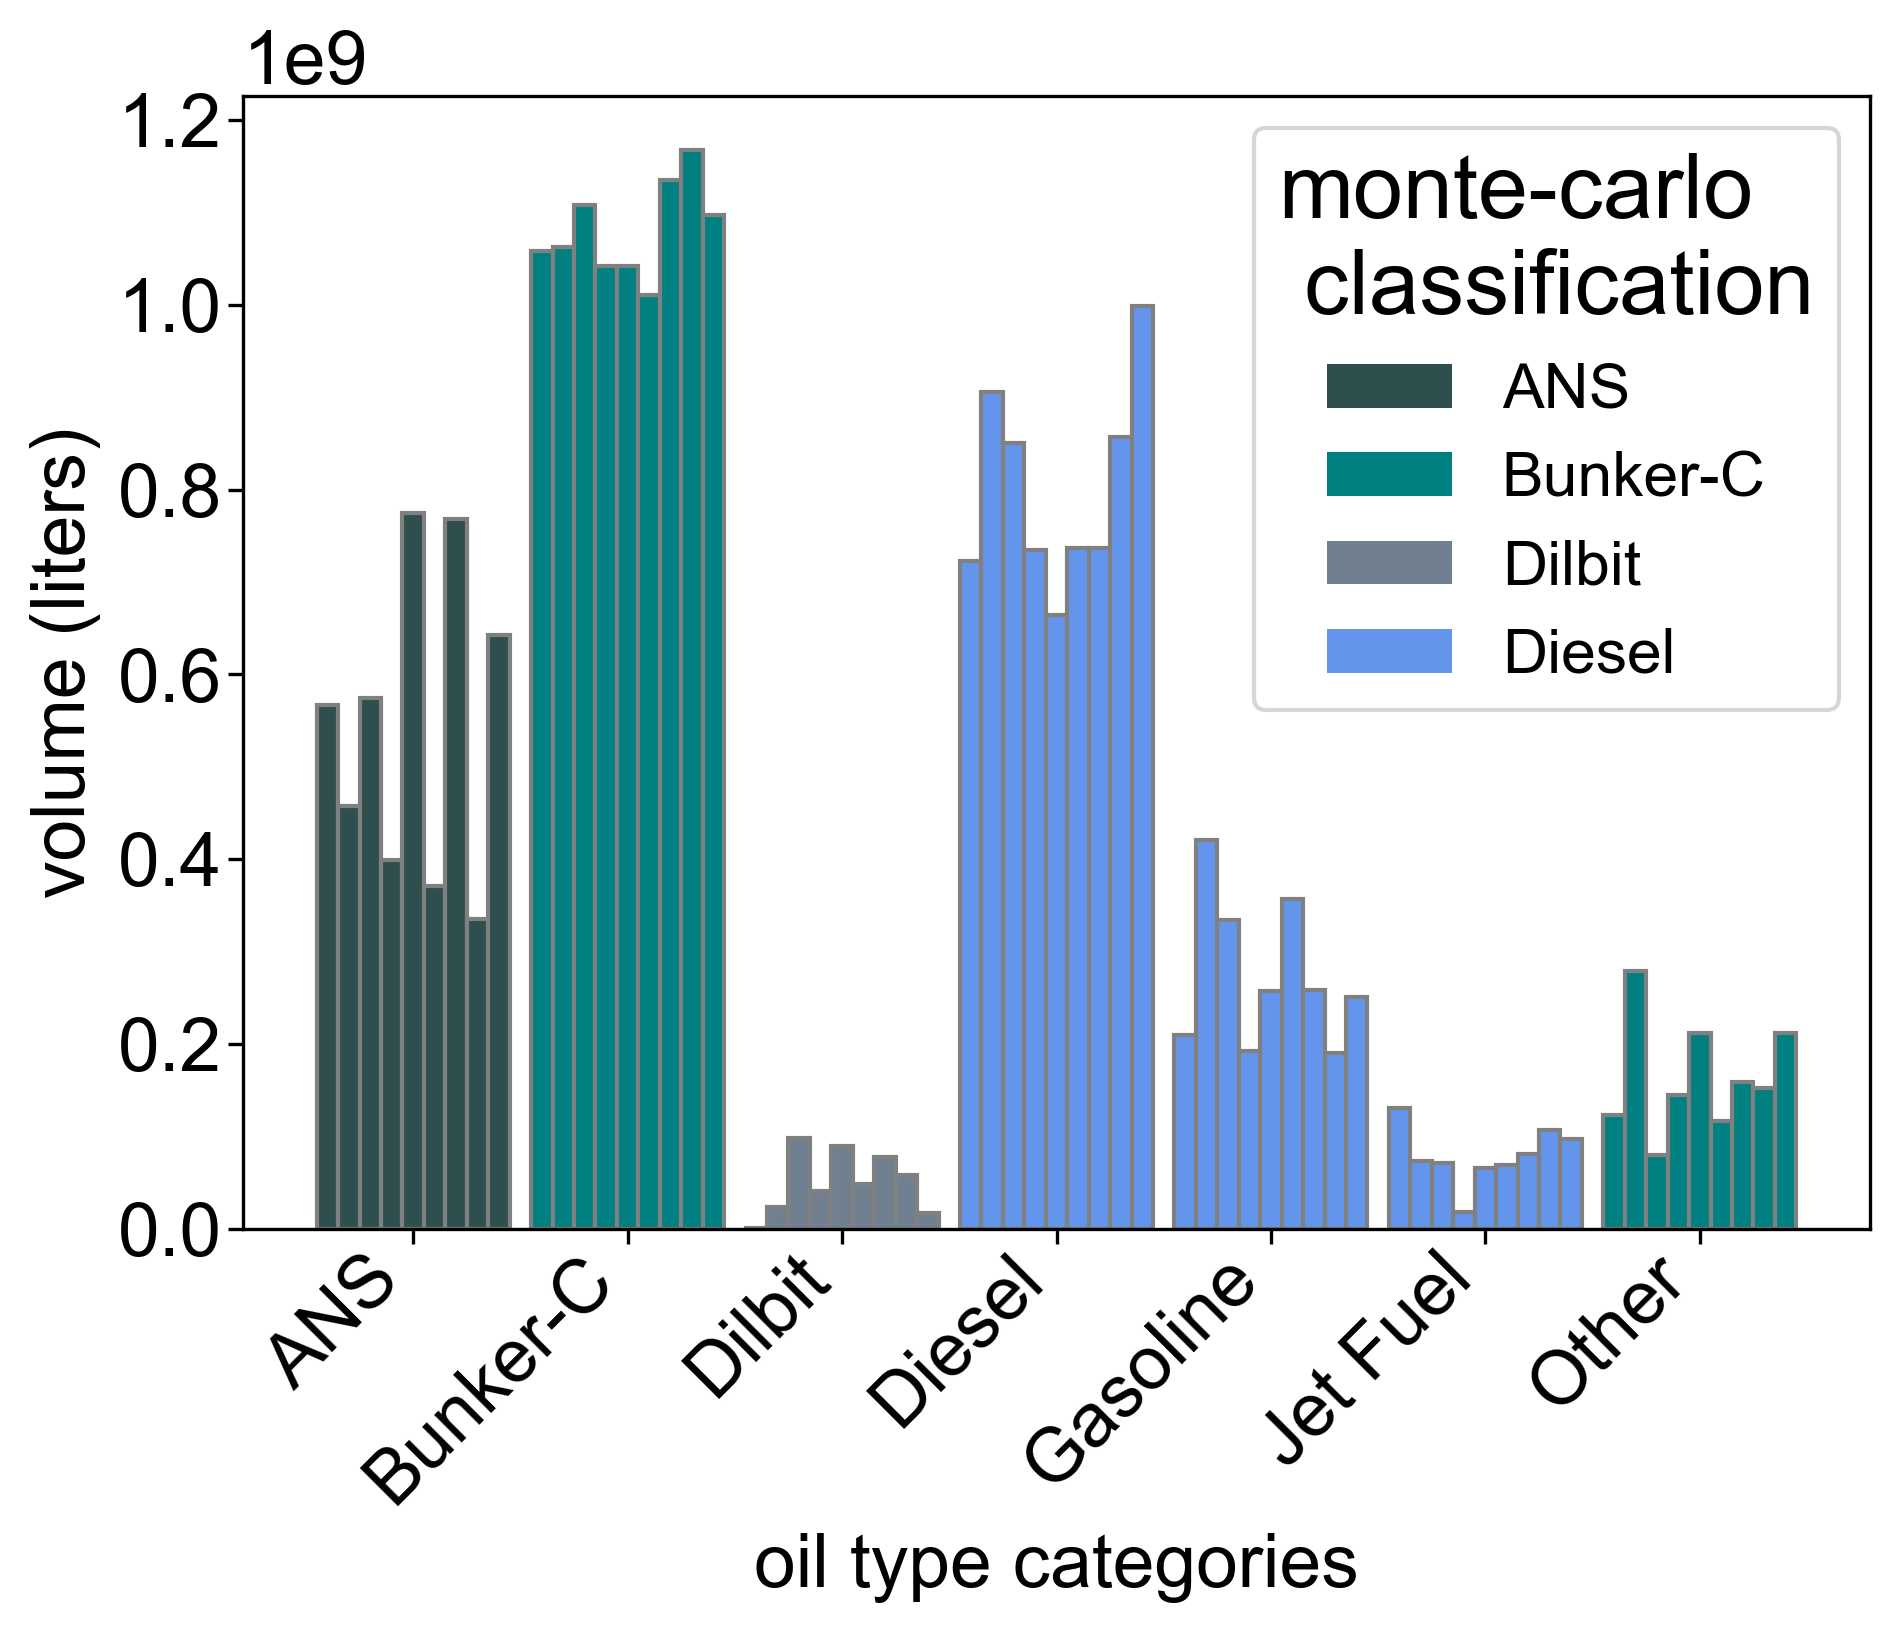

In [8]:
plt.rcParams['scatter.edgecolors']=0.8
width=0.1
ind = np.arange(len(oil.colors))
fig, ax = plt.subplots(1, 1,figsize=(7,5))
#Plot invisible bar graph but have the legends specified
for i, j in oil.MIDOSScolors.items(): #Loop over color dictionary
    ax.bar(1,plot_df[0][i],width=0,color=j,label=i) 
ax.bar(ind-4*width, plot_df[0].values, width, color=oil.colors,edgecolor='grey')
ax.bar(ind-3*width, plot_df[1].values, width, color=oil.colors,edgecolor='grey')
ax.bar(ind-2*width, plot_df[2].values, width, color=oil.colors,edgecolor='grey')
ax.bar(ind-width, plot_df[3].values, width, color=oil.colors,edgecolor='grey')
ax.bar(ind, plot_df[4].values, width, color=oil.colors,edgecolor='grey')
ax.bar(ind+width, plot_df[5].values, width, color=oil.colors,edgecolor='grey')
ax.bar(ind+2*width, plot_df[6].values, width, color=oil.colors,edgecolor='grey')
ax.bar(ind+3*width, plot_df[7].values, width, color=oil.colors,edgecolor='grey')
ax.bar(ind+4*width, plot_df[8].values, width, color=oil.colors,edgecolor='grey')
plt.ylabel('volume (liters)')
plt.xlabel('oil type categories')
plt.legend(bbox_to_anchor=(1.55, 1.0),loc=1)
ax.legend(title='monte-carlo\n classification')
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(oil.labels, rotation=45, ha="right")
plt.savefig(graphics_directory/'spillvolume_by_oiltype.png')

### Number of spills and spill volume by vessel type

In [9]:
vessels = [
    'atb', 'barge','tanker','cargo','cruise',
    'ferry','fishing','other','smallpass'
]


In [10]:
# create dictionary to tally spills by vessel
df={}
spill_count = {}
spill_volume = {}
spill_volume_max = {}
for vessel in vessels:
        spill_volume_max[vessel] = []
# loop through each 10,000 spill file and plot:
for file_index,file in enumerate(filenames):
    df[file_index] = pd.read_csv(file)
    spill_count[file_index] = {}
    spill_volume[file_index]={}
    # calculate and catalogue spill count
    spill_count[file_index] = df[file_index][
            ['spill_volume','vessel_type']
        ].groupby('vessel_type').count()
    spill_count[file_index] = spill_count[file_index].rename(
        columns = {'spill_volume':'spill_count'}
    )
    # calculate and catalogue spill volume
    spill_volume[file_index] = df[file_index][
            ['spill_volume','vessel_type']
        ].groupby('vessel_type').sum()
    for vessel in vessels:
        spill_volume_max[vessel].append(df[file_index][
                ['spill_volume','vessel_type']
            ].groupby('vessel_type').max()['spill_volume'][vessel])
    #ax = spill_count[file_index].spill_count[:].plot(label={'File #'file_index})
maxSpill={}
maxSpillAll = []
for vessel in vessels:
    maxSpill[vessel] = np.asarray(spill_volume_max[vessel]).max()
    maxSpillAll.append(maxSpill[vessel])
# maxSpillFraction = {}    
# maxSpillFraction{vessel: np.asarray(maxSpill[vessel])/np.asarray(maxSpillAll).max()}

In [11]:
# maxSpillFraction = {}    
# maxSpillFraction{vessel: np.asarray(maxSpill[vessel])/np.asarray(maxSpillAll).max()}

In [12]:
# maxSpillFraction

In [13]:
maxSpillFraction = pd.DataFrame(
    data=None, 
    index=spill_volume[0].index,
    columns=spill_volume[0].columns
)
maxSpillFraction=maxSpillFraction.rename(columns={"spill_volume": "max spill fraction"})
maxSpillFraction['max spill volume']=maxSpillFraction['max spill fraction']
orderedmax=[]
for vessel in vessels:
    maxSpillFraction.loc[vessel]['max spill fraction']=(
        np.asarray(maxSpill[vessel])/np.asarray(maxSpillAll).max()
    )
    orderedmax.append(maxSpill[vessel])
    maxSpillFraction.loc[vessel]['max spill volume']=maxSpill[vessel]
maxSpillFraction

,max spill fraction,max spill volume
vessel_type,,
atb,0.157842,27156756.495147
barge,0.160128,27550000.0
cargo,0.047557,8182230.431059
cruise,0.018022,3100680.265039
ferry,0.002693,463352.666097
fishing,0.00136,233962.189692
other,0.096521,16606401.761539
smallpass,0.000056,9714.431863
tanker,1.0,172050000.0


In [15]:
n=15 #>9 to avoid light greys
colors = plt.cm.cividis(np.linspace(0,1,n))

In [17]:
spill_count[0].spill_count

vessel_type
atb           154
barge        3756
cargo        1146
cruise        114
ferry        2252
fishing       492
other        1657
smallpass     290
tanker        139
Name: spill_count, dtype: int64

/tmp/ipykernel_960/1026902793.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(spill_count[0].index.to_list(),rotation=45, ha="right")


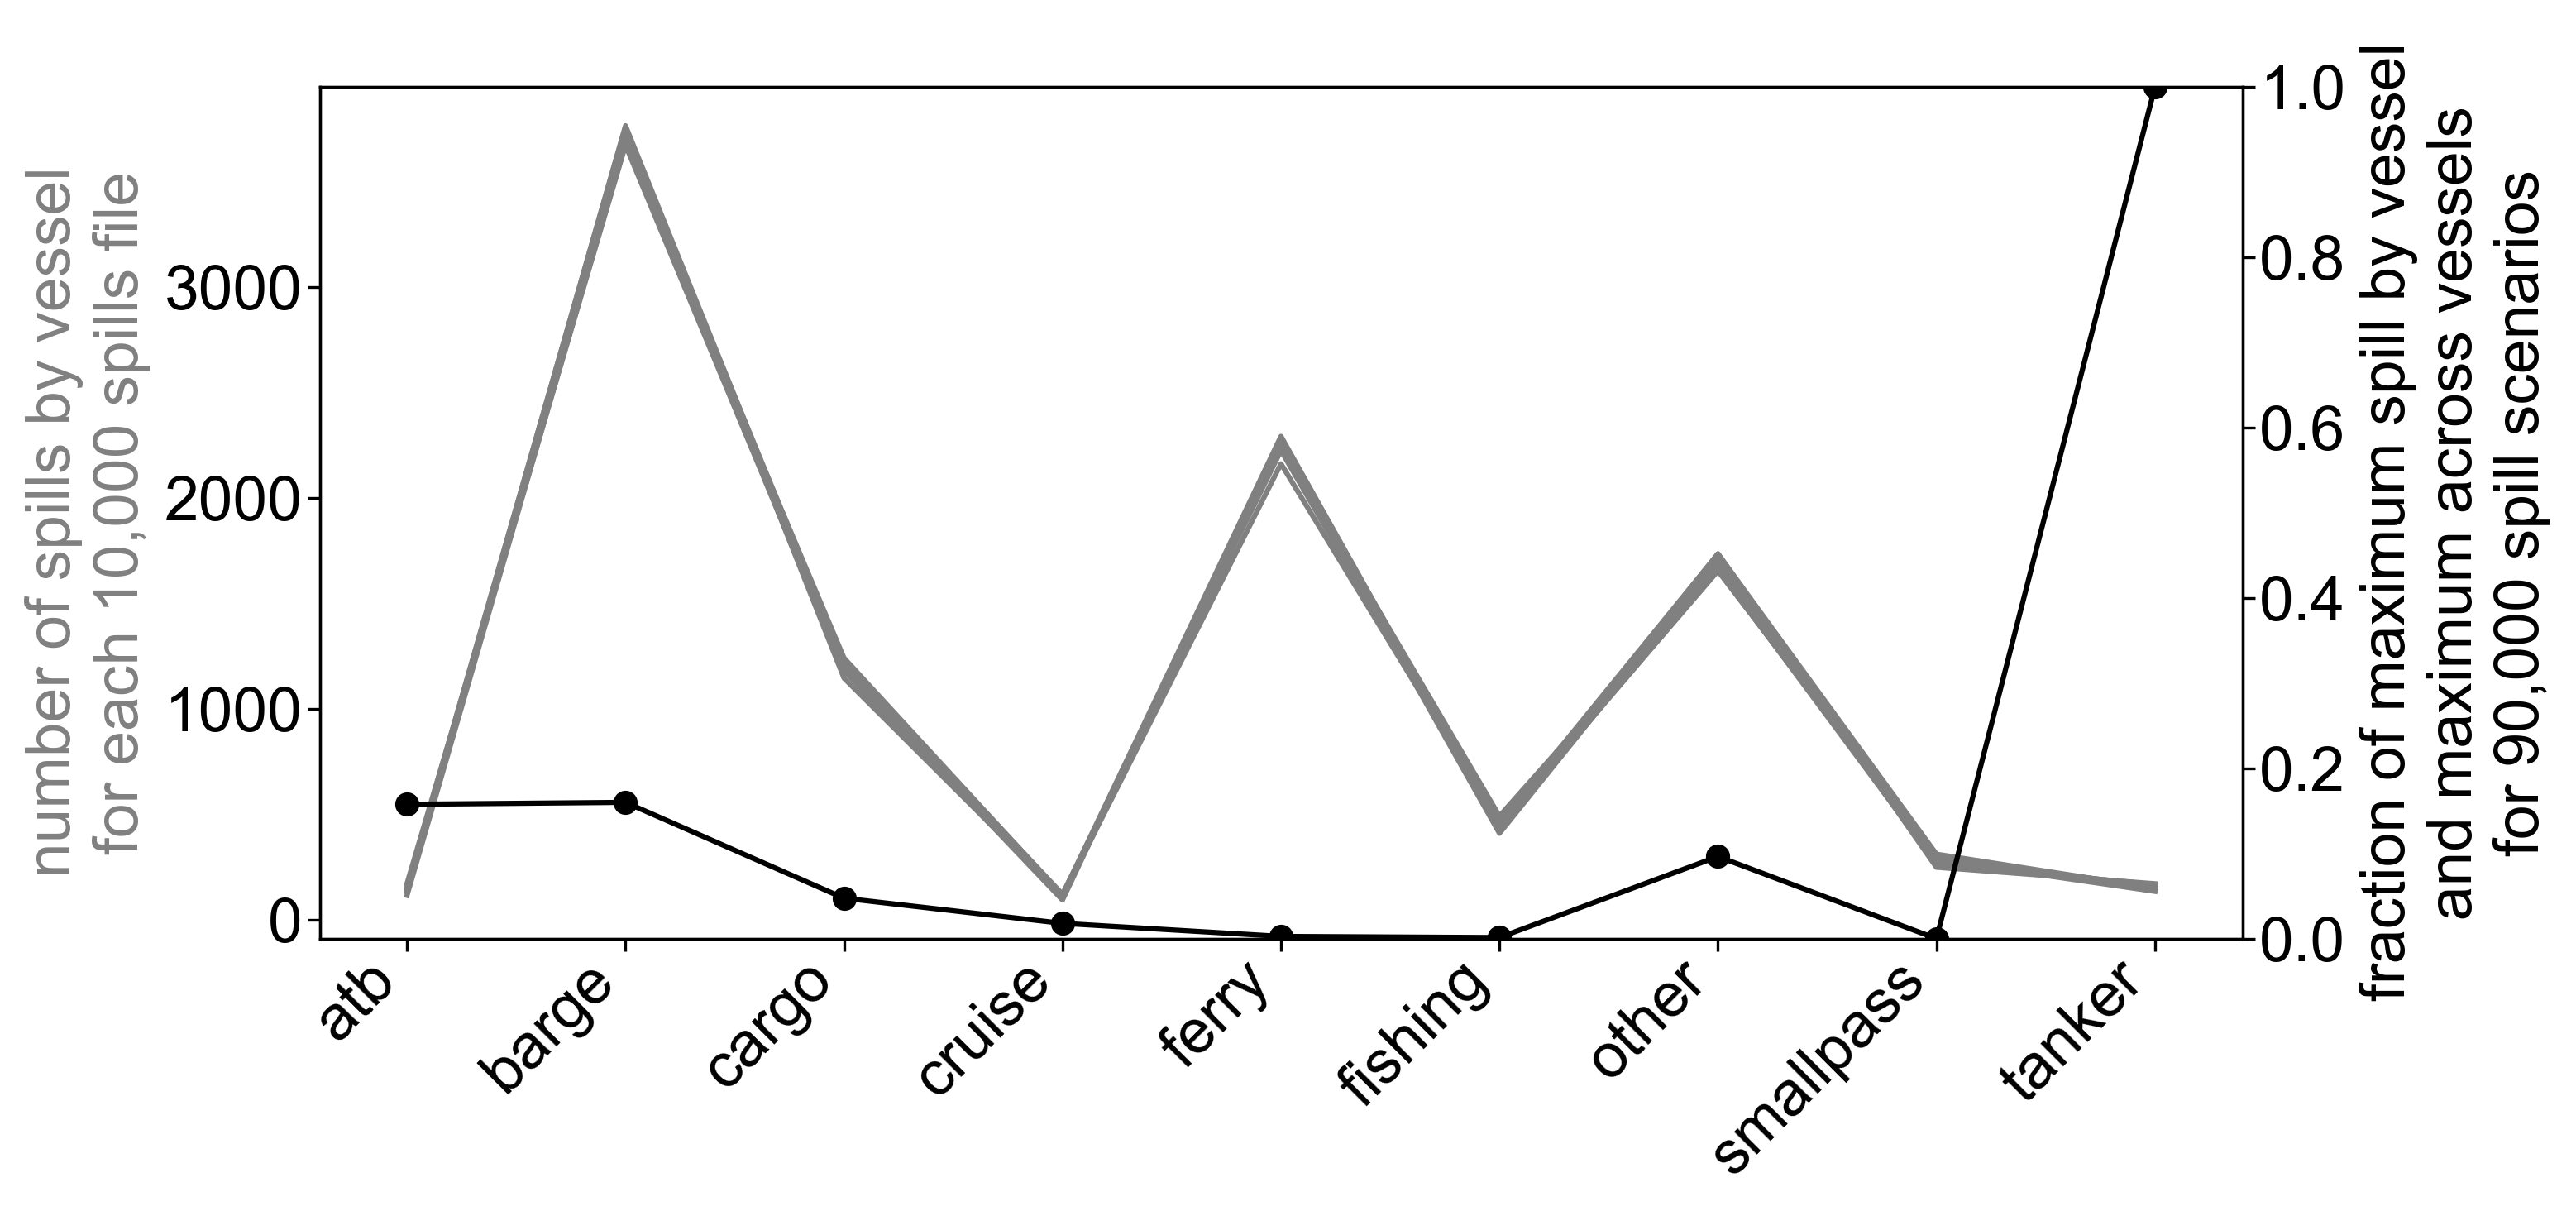

In [18]:
fig1 = plt.figure(figsize=(10, 10))
#1) spill count by vessel type
ax1 = fig1.add_subplot(211)
[ax1.plot(spill_count[ind].spill_count,'-', color='grey') for ind in np.arange(len(spill_count))]
ax1.set_xticklabels(spill_count[0].index.to_list(),rotation=45, ha="right")
#ax1.set_yticklabels(color='grey')
ax1.set_ylabel('number of spills by vessel \nfor each 10,000 spills file',color='grey')
ax2=ax1.twinx()
ax2.plot(maxSpillFraction['max spill fraction'], marker='o',color='k')
ax2.set_ylim(0,1)
ax2.set_ylabel('fraction of maximum spill by vessel \n and maximum across vessels \nfor 90,000 spill scenarios')
plt.show()
fig1.savefig(graphics_directory/'spillcount_by_vesseltype.png')

/tmp/ipykernel_960/2373572163.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(spill_volume[0].index.to_list(),rotation=45, ha="right")


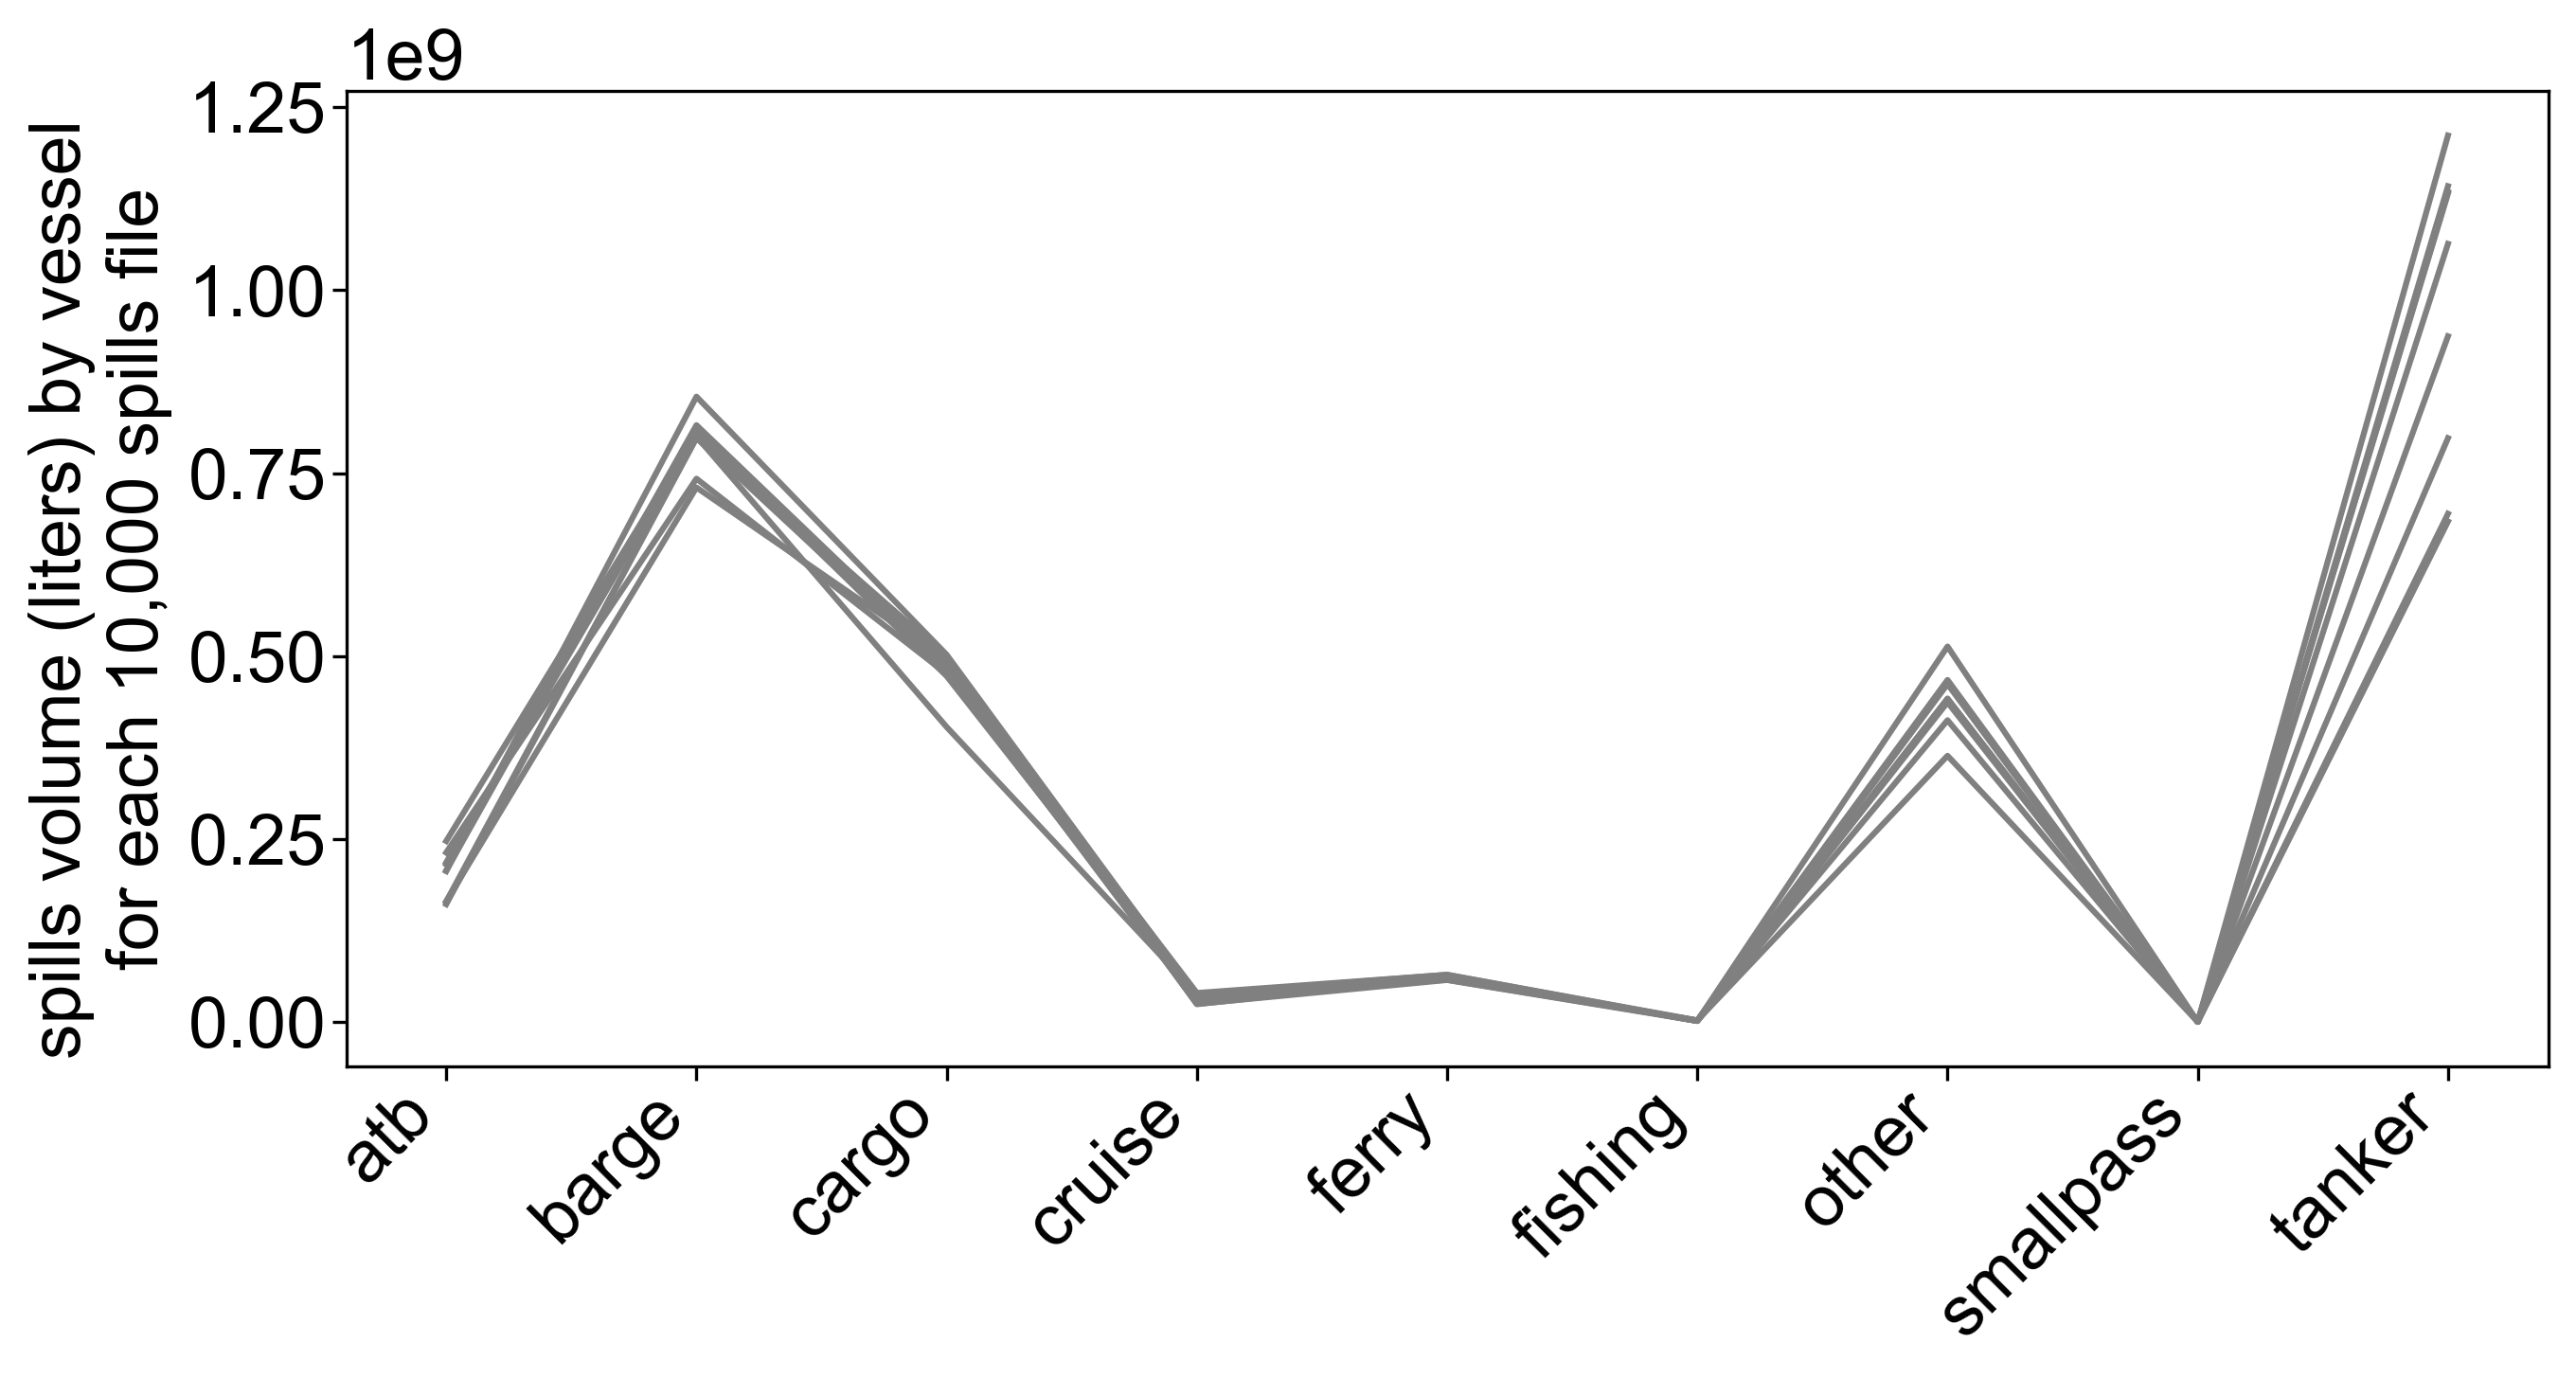

In [19]:
fig1 = plt.figure(figsize=(10, 10))
#1) spill count by vessel type
ax1 = fig1.add_subplot(211)
[ax1.plot(spill_volume[ind].spill_volume,'-', color='grey') for ind in np.arange(len(spill_count))]
ax1.set_xticklabels(spill_volume[0].index.to_list(),rotation=45, ha="right")
ax1.set_ylabel('spills volume (liters) by vessel \nfor each 10,000 spills file')
fig1.savefig(graphics_directory/'spillvolume_by_vesseltype.png')

## Plot oil capacities for cargo, atb, tanker
- Cargo: Line fit
- ATB: 
    - <= 50 m: Random cargo capacity by weights determined by number of AIS ship tracks
    - GT  50 m: Calculate capacity from linear fit
            C = oil_attrs["vessel_attributes"]["atb"]["cargo_fit_coefs"]
            fit_capacity = C[1] + C[0] * vessel_length
            # impose thresholds to yield output capacity
            cargo_capacity = _clamp(fit_capacity, atb_min_cargo, atb_max_cargo)
- Tanker: 
    - fuel_capacity = oil_attrs["vessel_attributes"]["tanker"][
            "fuel_capacity"
        ][bin_index]
    - cargo_capacity = oil_attrs["vessel_attributes"]["tanker"][
                "cargo_capacity"
            ][bin_index]
    - elif vessel_length > 150 and vessel_length <= 200:
            c_bin = oil_attrs["vessel_attributes"]["tanker"]["handy_capacity"]
            c_weight = oil_attrs["vessel_attributes"]["tanker"]["handy_weights"]
            cargo_capacity = random_generator.choice(
                c_bin,
                p = c_weight
            )
                
                

In [21]:
# load oil attribution file 
oilattrs_file = '/data/MIDOSS/marine_transport_data/oil_attribution.yaml'
with open(oilattrs_file, 'r') as file:
    oil_attrs = yaml.load(file, Loader=yaml.FullLoader)

In [6]:
handy_capacity = np.array(oil_attrs["vessel_attributes"]["tanker"]["handy_capacity"])
handy_weights = np.array(oil_attrs["vessel_attributes"]["tanker"]["handy_weights"])

In [23]:
#~~~ cargo traffic ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cargo_df = pd.read_excel(
    oil_attrs['files']['oil_capacity'],
    sheet_name='cargo', 
    usecols='B,D,I,J'
)
length = cargo_df['vessel length (m)']
capacity = cargo_df['fuel capacity (liters)']
vessel_type = 'cargo'
cargo_length = np.arange(150, 400, 10)
C = oil_attrs['vessel_attributes']['cargo']['fuel_fit_coefs']
cargo_fit = (
    np.exp(C[1]) * 
    np.exp(C[0]*cargo_length)
)

# add ais-curated frequency data 
good_data = length>0


### Show plot of ATB cargo bins

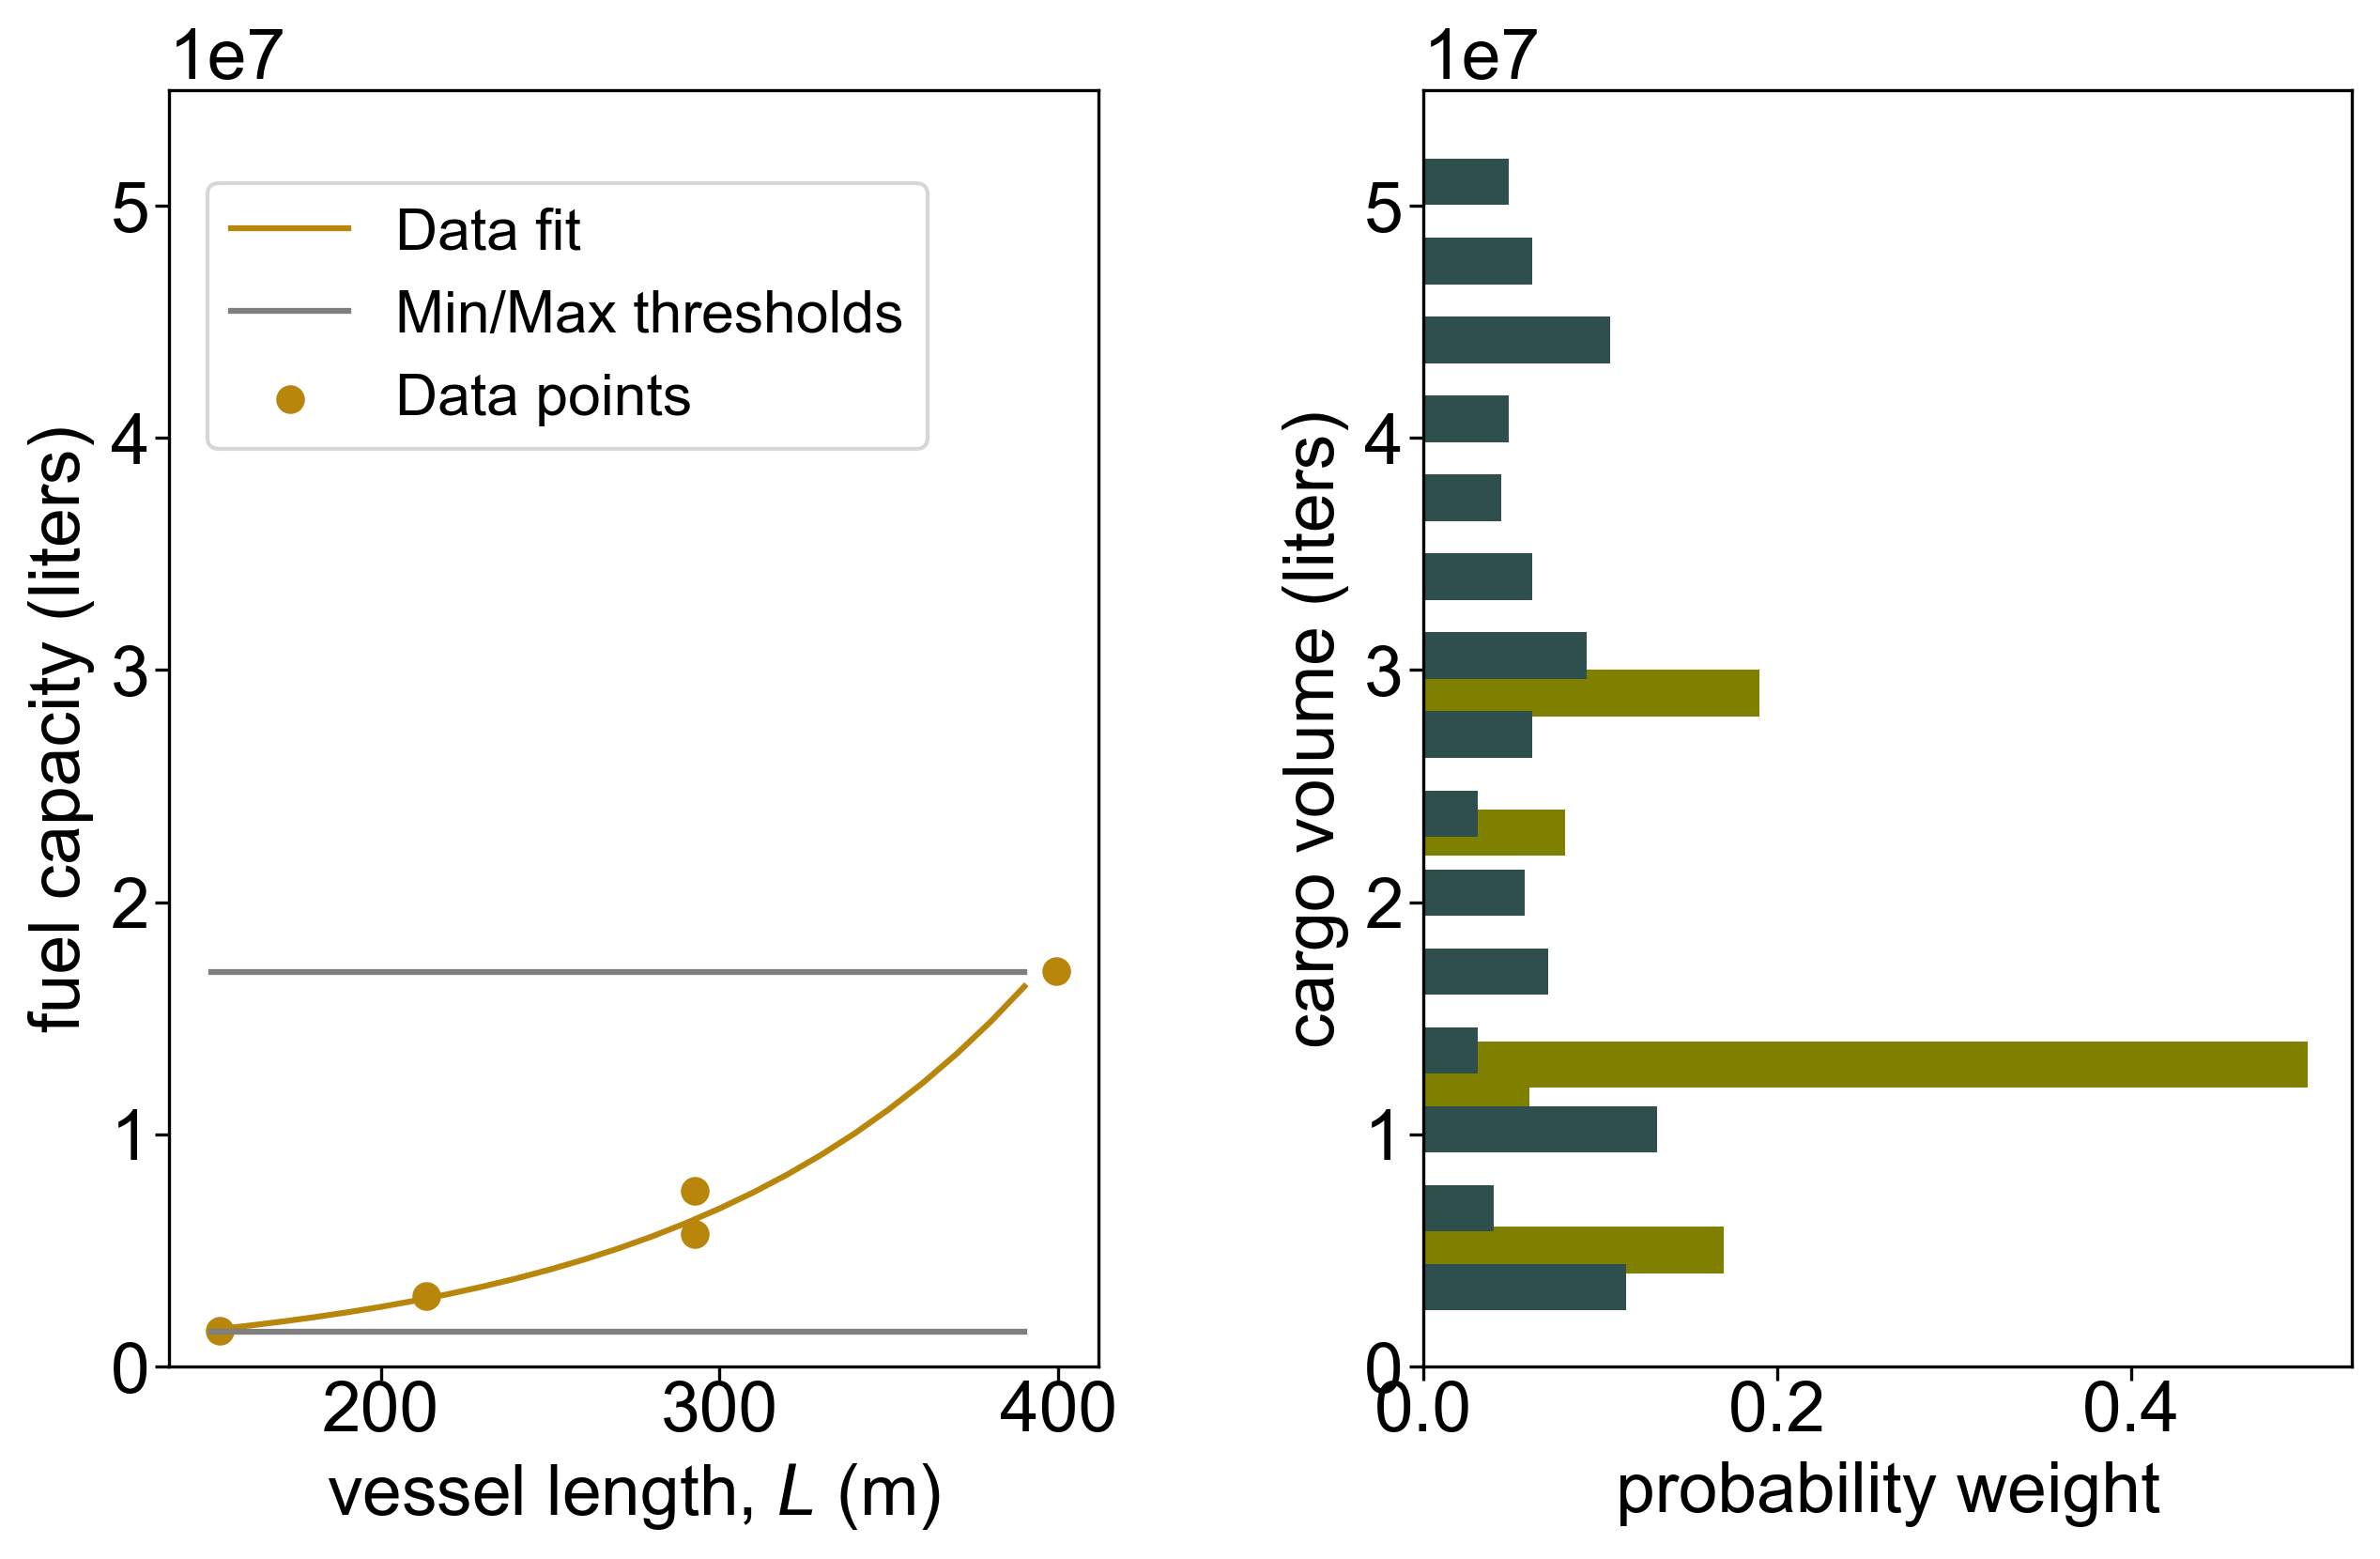

In [25]:
fig = plt.figure() 
# to change size of subplot's
# set height of each subplot as 8
fig.set_figheight(6)
# set width of each subplot as 8
fig.set_figwidth(10) 
# create grid for different subplots
spec = gridspec.GridSpec(ncols=2, nrows=1,wspace=.35,
                         hspace=1,width_ratios=[10,10])
                        #height_ratios=[4])
ax={}
ax[0] = fig.add_subplot(spec[0])
ax[1] = fig.add_subplot(spec[1])
ax[0].scatter(
    length[good_data],
    capacity[good_data],
    40,
    label='Data points',
    color=oil.vesselcolors['cargo']
)

ax[0].plot(
    cargo_length, 
    cargo_fit, 
    c=oil.vesselcolors['cargo'], 
    label='Data fit'#f'{np.exp(C[1]):.02e}e^{C[0]:.02f}$L$'
)

ax[0].plot(
    [np.min(cargo_length), np.max(cargo_length)],
    [oil_attrs['vessel_attributes']['cargo']['min_fuel'], 
     oil_attrs['vessel_attributes']['cargo']['min_fuel']],
    c='tab:grey',
    label='Min/Max thresholds'
)
ax[0].plot(
    [np.min(cargo_length), np.max(cargo_length)],
    [oil_attrs['vessel_attributes']['cargo']['max_fuel'], 
     oil_attrs['vessel_attributes']['cargo']['max_fuel']],
    c='tab:grey'
)
ax[0].set_ylim(0,5.5e7)
ax[0].set_xlabel('vessel length, $L$ (m)')
ax[0].set_ylabel('fuel capacity (liters)')
#ax1.set_title('Container Ship')
ax[0].legend(bbox_to_anchor=(0.01, 0.95), loc='upper left')

# TANK traffic
# ax2 = fig.add_subplot(122)
ax[1].barh(atb_capacity,atb_weights, 
         2e6,
         color=oil.vesselcolors['atb'],
         label='AIS-informed ATB weights')
ax[1].barh(handy_capacity,handy_weights, 
         2e6,
         color=oil.vesselcolors['tanker'],
         label='AIS-informed ATB weights')
ax[1].set(ylabel='cargo volume (liters)')
ax[1].set_xlabel('probability weight')
ax[1].set_ylim(0,5.5e7)

plt.savefig(graphics_directory/'ContainerFuel_vs_ATB&HandyCargo.png')


In [27]:
oil_attrs['vessel_attributes']['atb']['cargo_fit_coefs']

[236476.57106585318, -20810153.33061897]

In [26]:
oil.vesselcolors['atb']

'olive'

/tmp/ipykernel_10651/1485478550.py:27: RuntimeWarning: overflow encountered in exp
  np.exp(C[0]*atb_length)
/tmp/ipykernel_10651/1485478550.py:26: RuntimeWarning: invalid value encountered in multiply
  np.exp(C[1])*


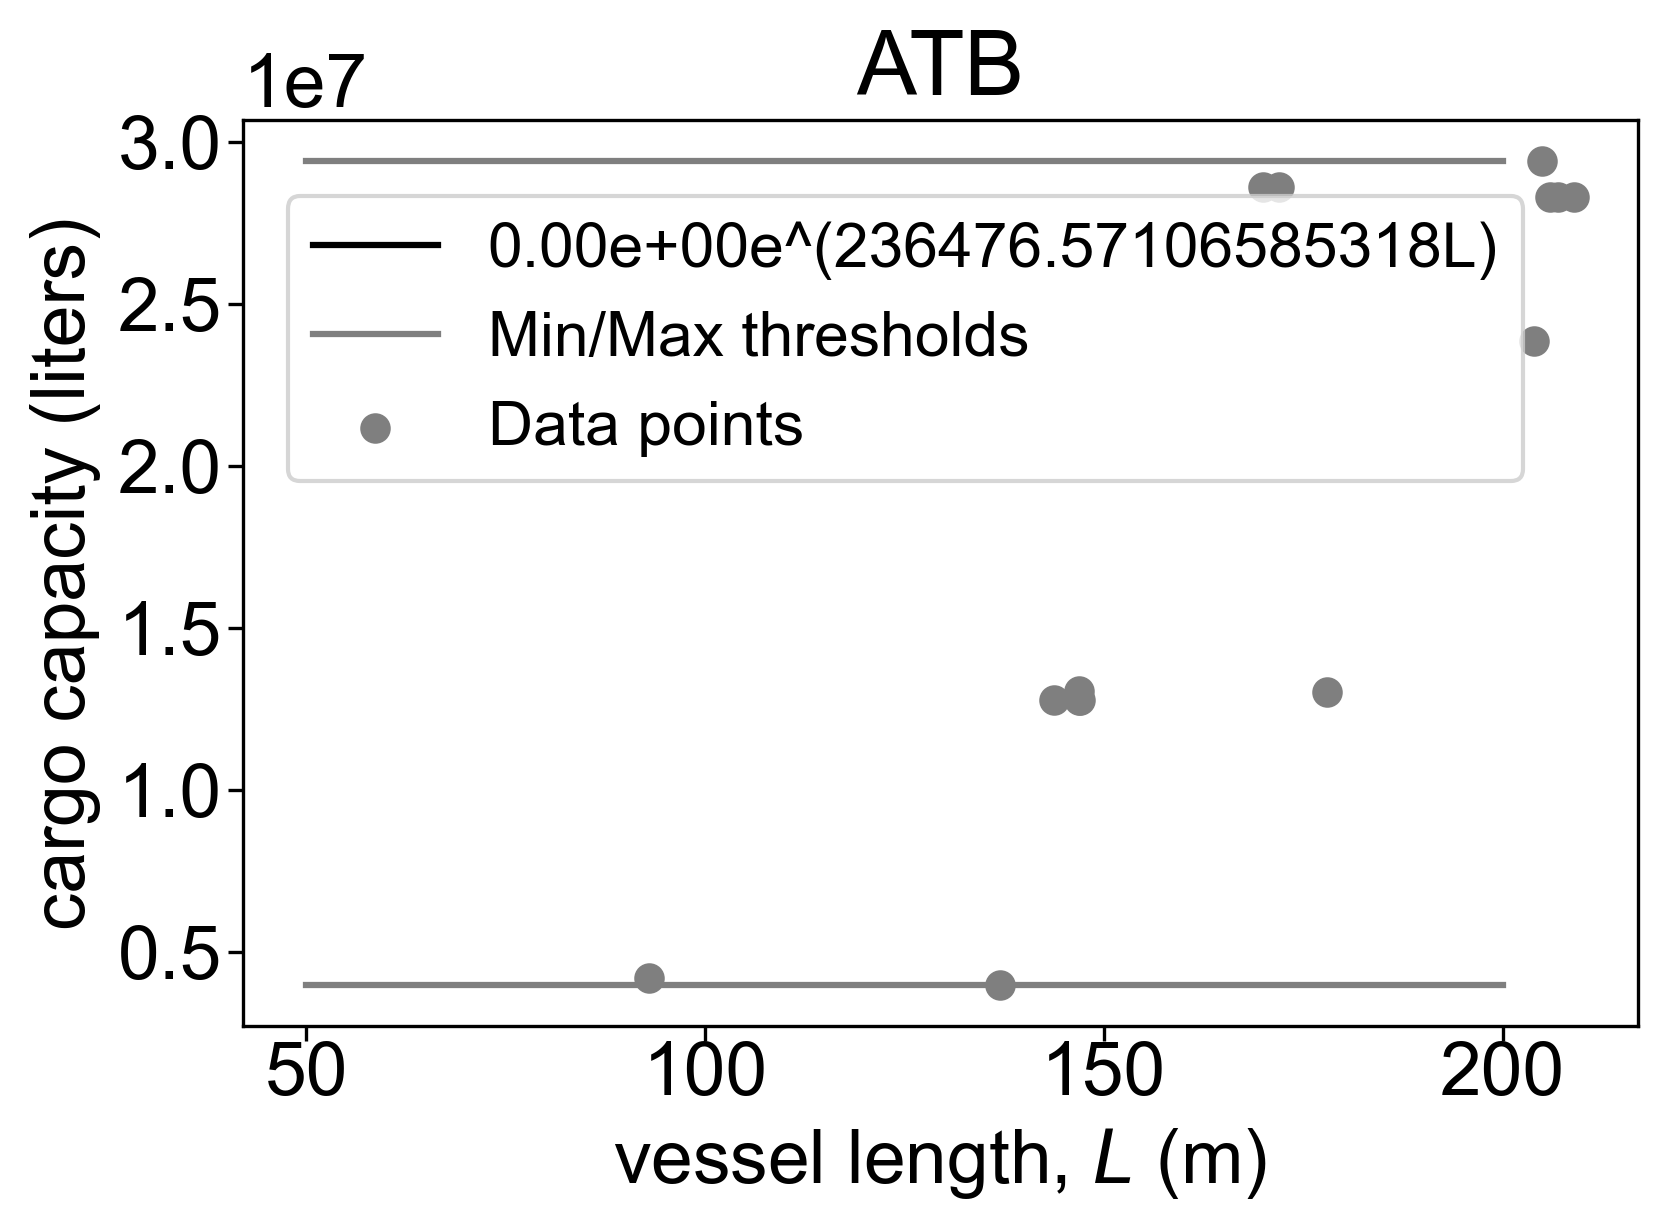

## Create histogram of tanker lengths

In [28]:
# Concatenate tanker ship tracks then save to file for future use
# allTracks_tanker = concat_shp("tanker")
# allTracks_tanker.to_file("/home/rmueller/data/MIDOSS/Shapefiles/tanker_2018_allMonths.shp")

In [29]:
%%time
allTracks_tanker = gpd.read_file("/home/rmueller/data/MIDOSS/Shapefiles/tanker_2018_allMonths.shp")
allTracks_tanker = allTracks_tanker.reset_index(drop=True)

CPU times: user 1min 9s, sys: 2.34 s, total: 1min 11s
Wall time: 1min 12s


In [30]:
allTracks_tanker.head()

,MMSI_NUM,ST_DATE,EN_DATE,LENGTH,TO,FROM_,geometry
0,219602000.0,2018-01-15 07:56:24,2018-01-15 07:57:24,182,US,Pacific,"LINESTRING (-128.28361 46.80076, -128.27895 46..."
1,219602000.0,2018-01-15 07:57:24,2018-01-15 07:58:58,182,US,Pacific,"LINESTRING (-128.27895 46.80302, -128.27150 46..."
2,219602000.0,2018-01-15 07:58:58,2018-01-15 07:59:27,182,US,Pacific,"LINESTRING (-128.27150 46.80663, -128.26953 46..."
3,219602000.0,2018-01-15 07:59:27,2018-01-15 07:59:46,182,US,Pacific,"LINESTRING (-128.26953 46.80759, -128.26766 46..."
4,219602000.0,2018-01-15 07:59:46,2018-01-15 08:01:24,182,US,Pacific,"LINESTRING (-128.26766 46.80852, -128.26025 46..."


In [31]:

bins = []
bins.append((0, 60))
bins.append((61, 150))
bins.append((151, 200))
bins.append((201, 250))
bins.append((251, 300))
binned_data = np.zeros(len(bins))
size_classes = [
    "Smallest Tanker (< 60 m)",
    "Small Tanker (61 - 150 m)", 
    "Handymax (151-200 m)", 
    "Aframax (201-250 m)", 
    "Suezmax (251-300 m)" 
]
binned_mmsi = pd.DataFrame(columns = size_classes)
for idx,value in enumerate(allTracks_tanker["LENGTH"]):
    if value > 0:
        bin_index = get_bin(value, bins)  
        binned_data[bin_index] += 1  

0 19025.0
1 84730.0
2 572427.0
3 142846.0
4 272345.0


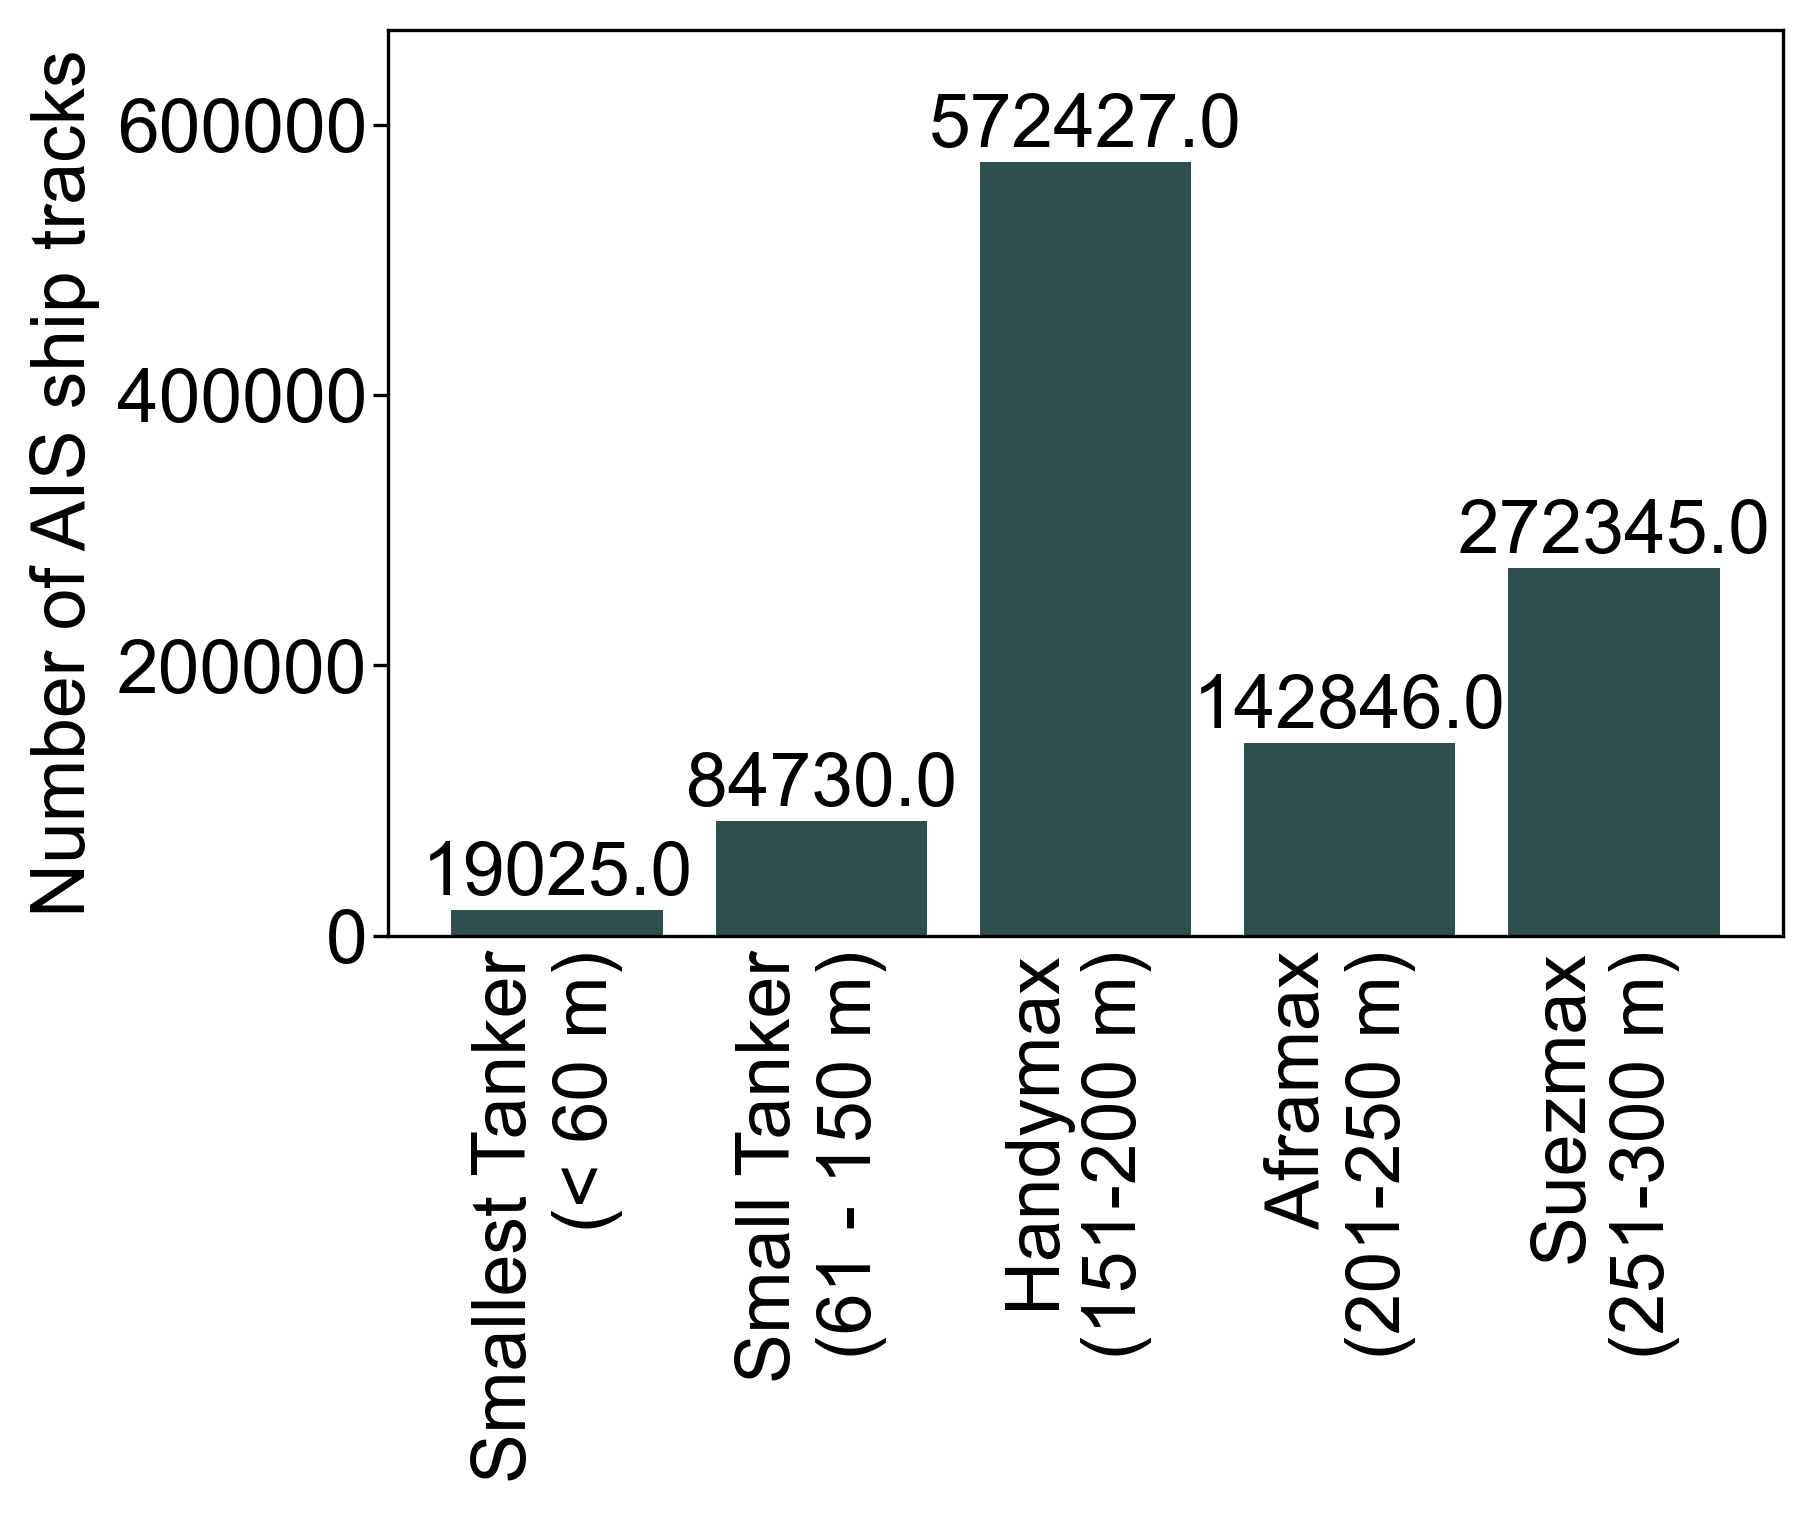

In [32]:
# Create list of names for tanker size classes evaluated
size_classes_label = [
    "Smallest Tanker\n(< 60 m)",
    "Small Tanker\n(61 - 150 m)", 
    "Handymax\n(151-200 m)", 
    "Aframax\n(201-250 m)", 
    "Suezmax\n(251-300 m)" 
]
fig, ax = plt.subplots()    
#width = 0.75 # the width of the bars 
ind = np.arange(len(binned_data))  # the x locations for the groups
ax.bar(ind, binned_data, color=oil.vesselcolors["tanker"])
ax.set_xticks(ind+1/4)
ax.set_xticklabels(size_classes_label, minor=False, rotation=90, ha='right')
ax.set_ylim(0, 670000)
ax.tick_params(axis = "x", which = "both", bottom = False, top = False)
#plt.title('Number of AIS ship tracks in 2018, by tanker size class ')
#plt.xlabel('Tanker size class', rotation=45)
plt.ylabel('Number of AIS ship tracks')
for i, v in enumerate(binned_data):
    print(i,v)
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.savefig(graphics_directory/'Tanker_2018AISpings_bySize.png')

In [33]:
## From oil_attribution.ipynb
one_way=[35/37,48/48,134/(134+93),8/10,39/42]
two_way=[2/37,0/48,134/(134+93),2/10,3/42]
## From monte_carlo_QAQC/QAQC_Tanker_AISlengths_DOEcapacities.ipynb
percent_traffic = [1,.5455,.5815,.1799,.5080]

3402326.5080000004
51034897.620000005


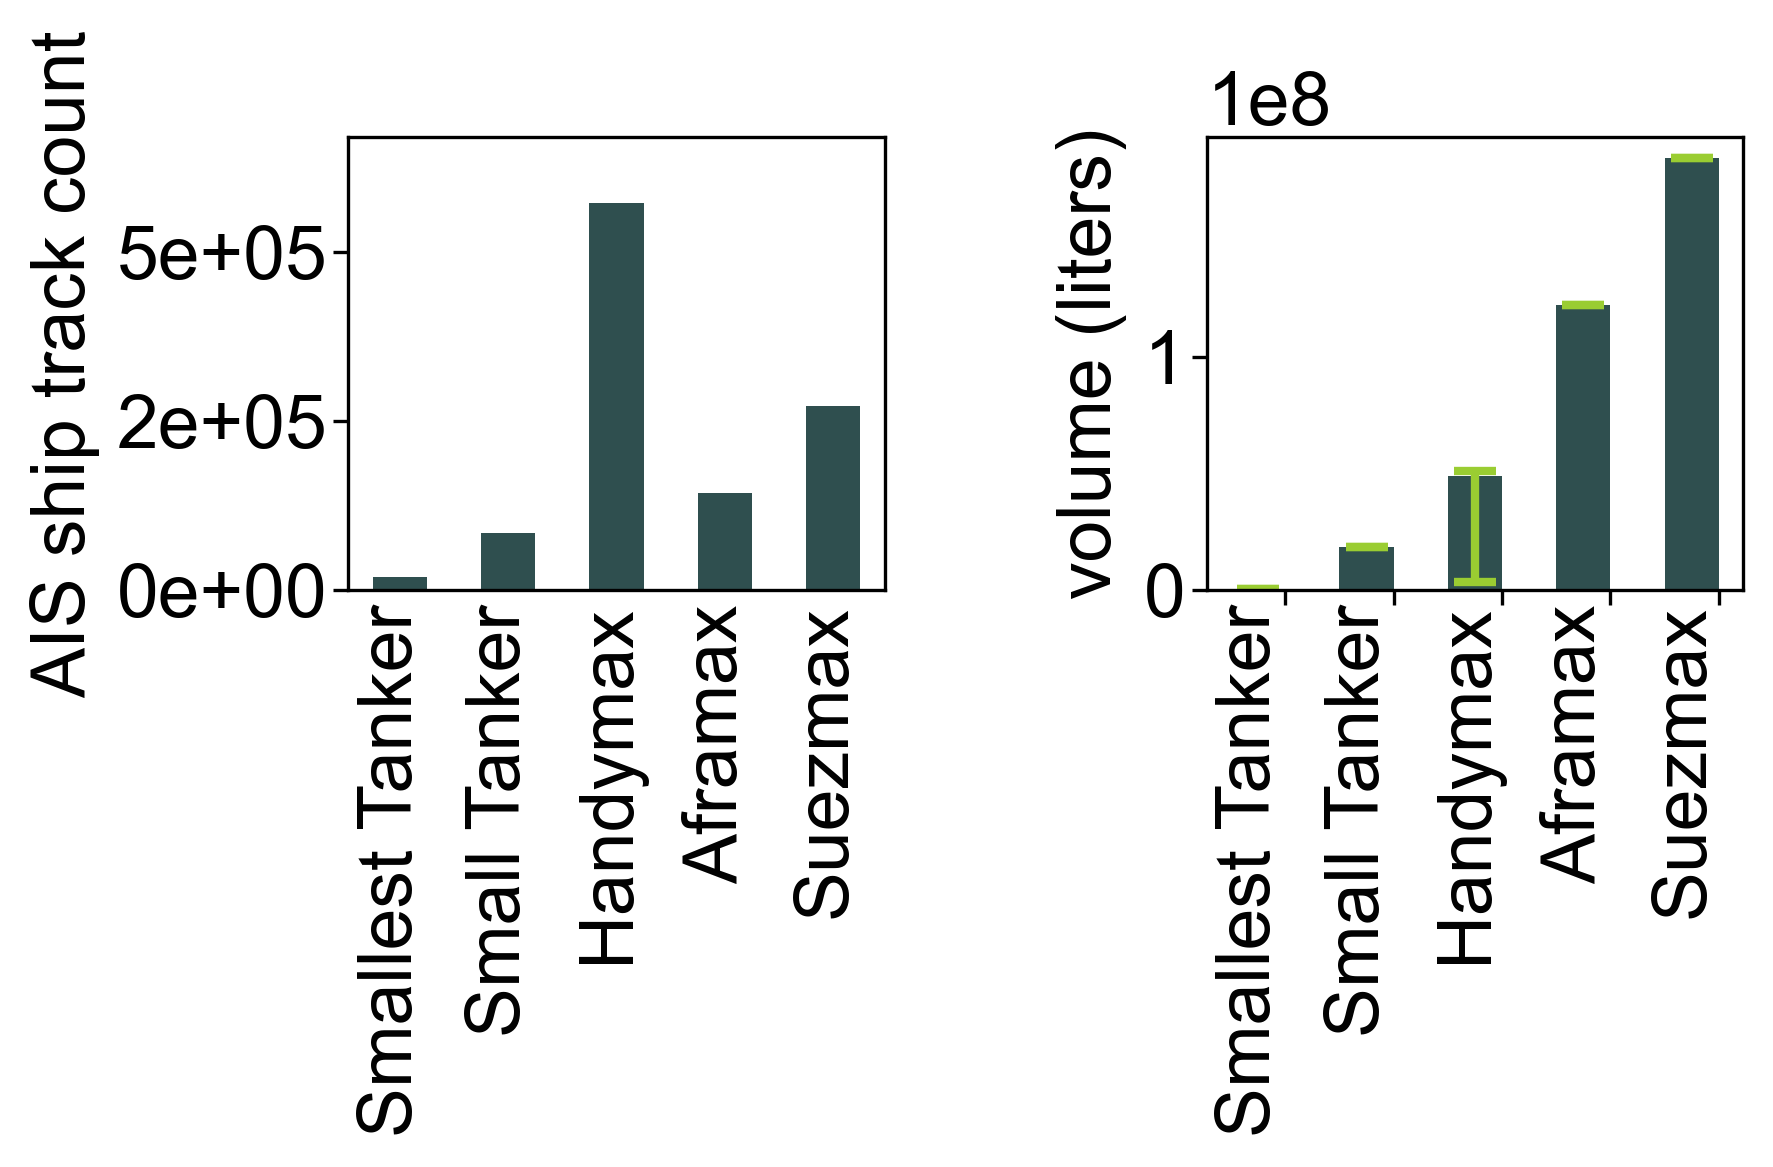

In [34]:
size_classes_label = [
    "Smallest Tanker",
    "Small Tanker", 
    "Handymax", 
    "Aframax", 
    "Suezmax" 
]
import matplotlib.ticker as mtick
# min/max of oil capacity for handymax
handy_min = np.asarray(oil_attrs['vessel_attributes']['tanker']['handy_capacity']).min()
handy_max = np.asarray(oil_attrs['vessel_attributes']['tanker']['handy_capacity']).max()
print(handy_min)
print(handy_max)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 2),
                       gridspec_kw={
                           'width_ratios': [3, 3],
                           'height_ratios': [1],
                       'wspace': 0.6,
                       'hspace': 0.6})   
#width = 0.75 # the width of the bars 
ind = np.arange(len(binned_data))  # the x locations for the groups
ax[0].bar(ind, binned_data, 0.5, color=oil.vesselcolors["tanker"])
ax[0].set_xticks(ind+1/4)
ax[0].set_xticklabels(size_classes_label, minor=False, rotation=90, ha='right')
ax[0].set_ylim(0, 6.7e5)
ax[0].tick_params(axis = "x", which = "both", bottom = False, top = False)
#plt.title('Number of AIS ship tracks in 2018, by tanker size class ')
#plt.xlabel('Tanker size class', rotation=45)
ax[0].set_ylabel('AIS ship track count')
ax[0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

## Cargo capacities for different size classes
tanker_capacities = oil_attrs['vessel_attributes']['tanker']['cargo_capacity'][0:5]
ax[1].bar(ind, tanker_capacities, 0.5, 
          yerr=[[0,0,tanker_capacities[2]-handy_min,0,0],[0,0,handy_max-tanker_capacities[2],0,0]],
          error_kw=dict(ecolor='yellowgreen', lw=2, capsize=5, capthick=2),
          color=oil.vesselcolors["tanker"])
ax[1].set_xticks(ind+1/4)
ax[1].set_xticklabels(size_classes_label, minor=False, rotation=90, ha='right')
ax[1].set_ylabel('volume (liters)')
plt.savefig(graphics_directory/'Tanker_2018AISPings&Volume_bySize.png')

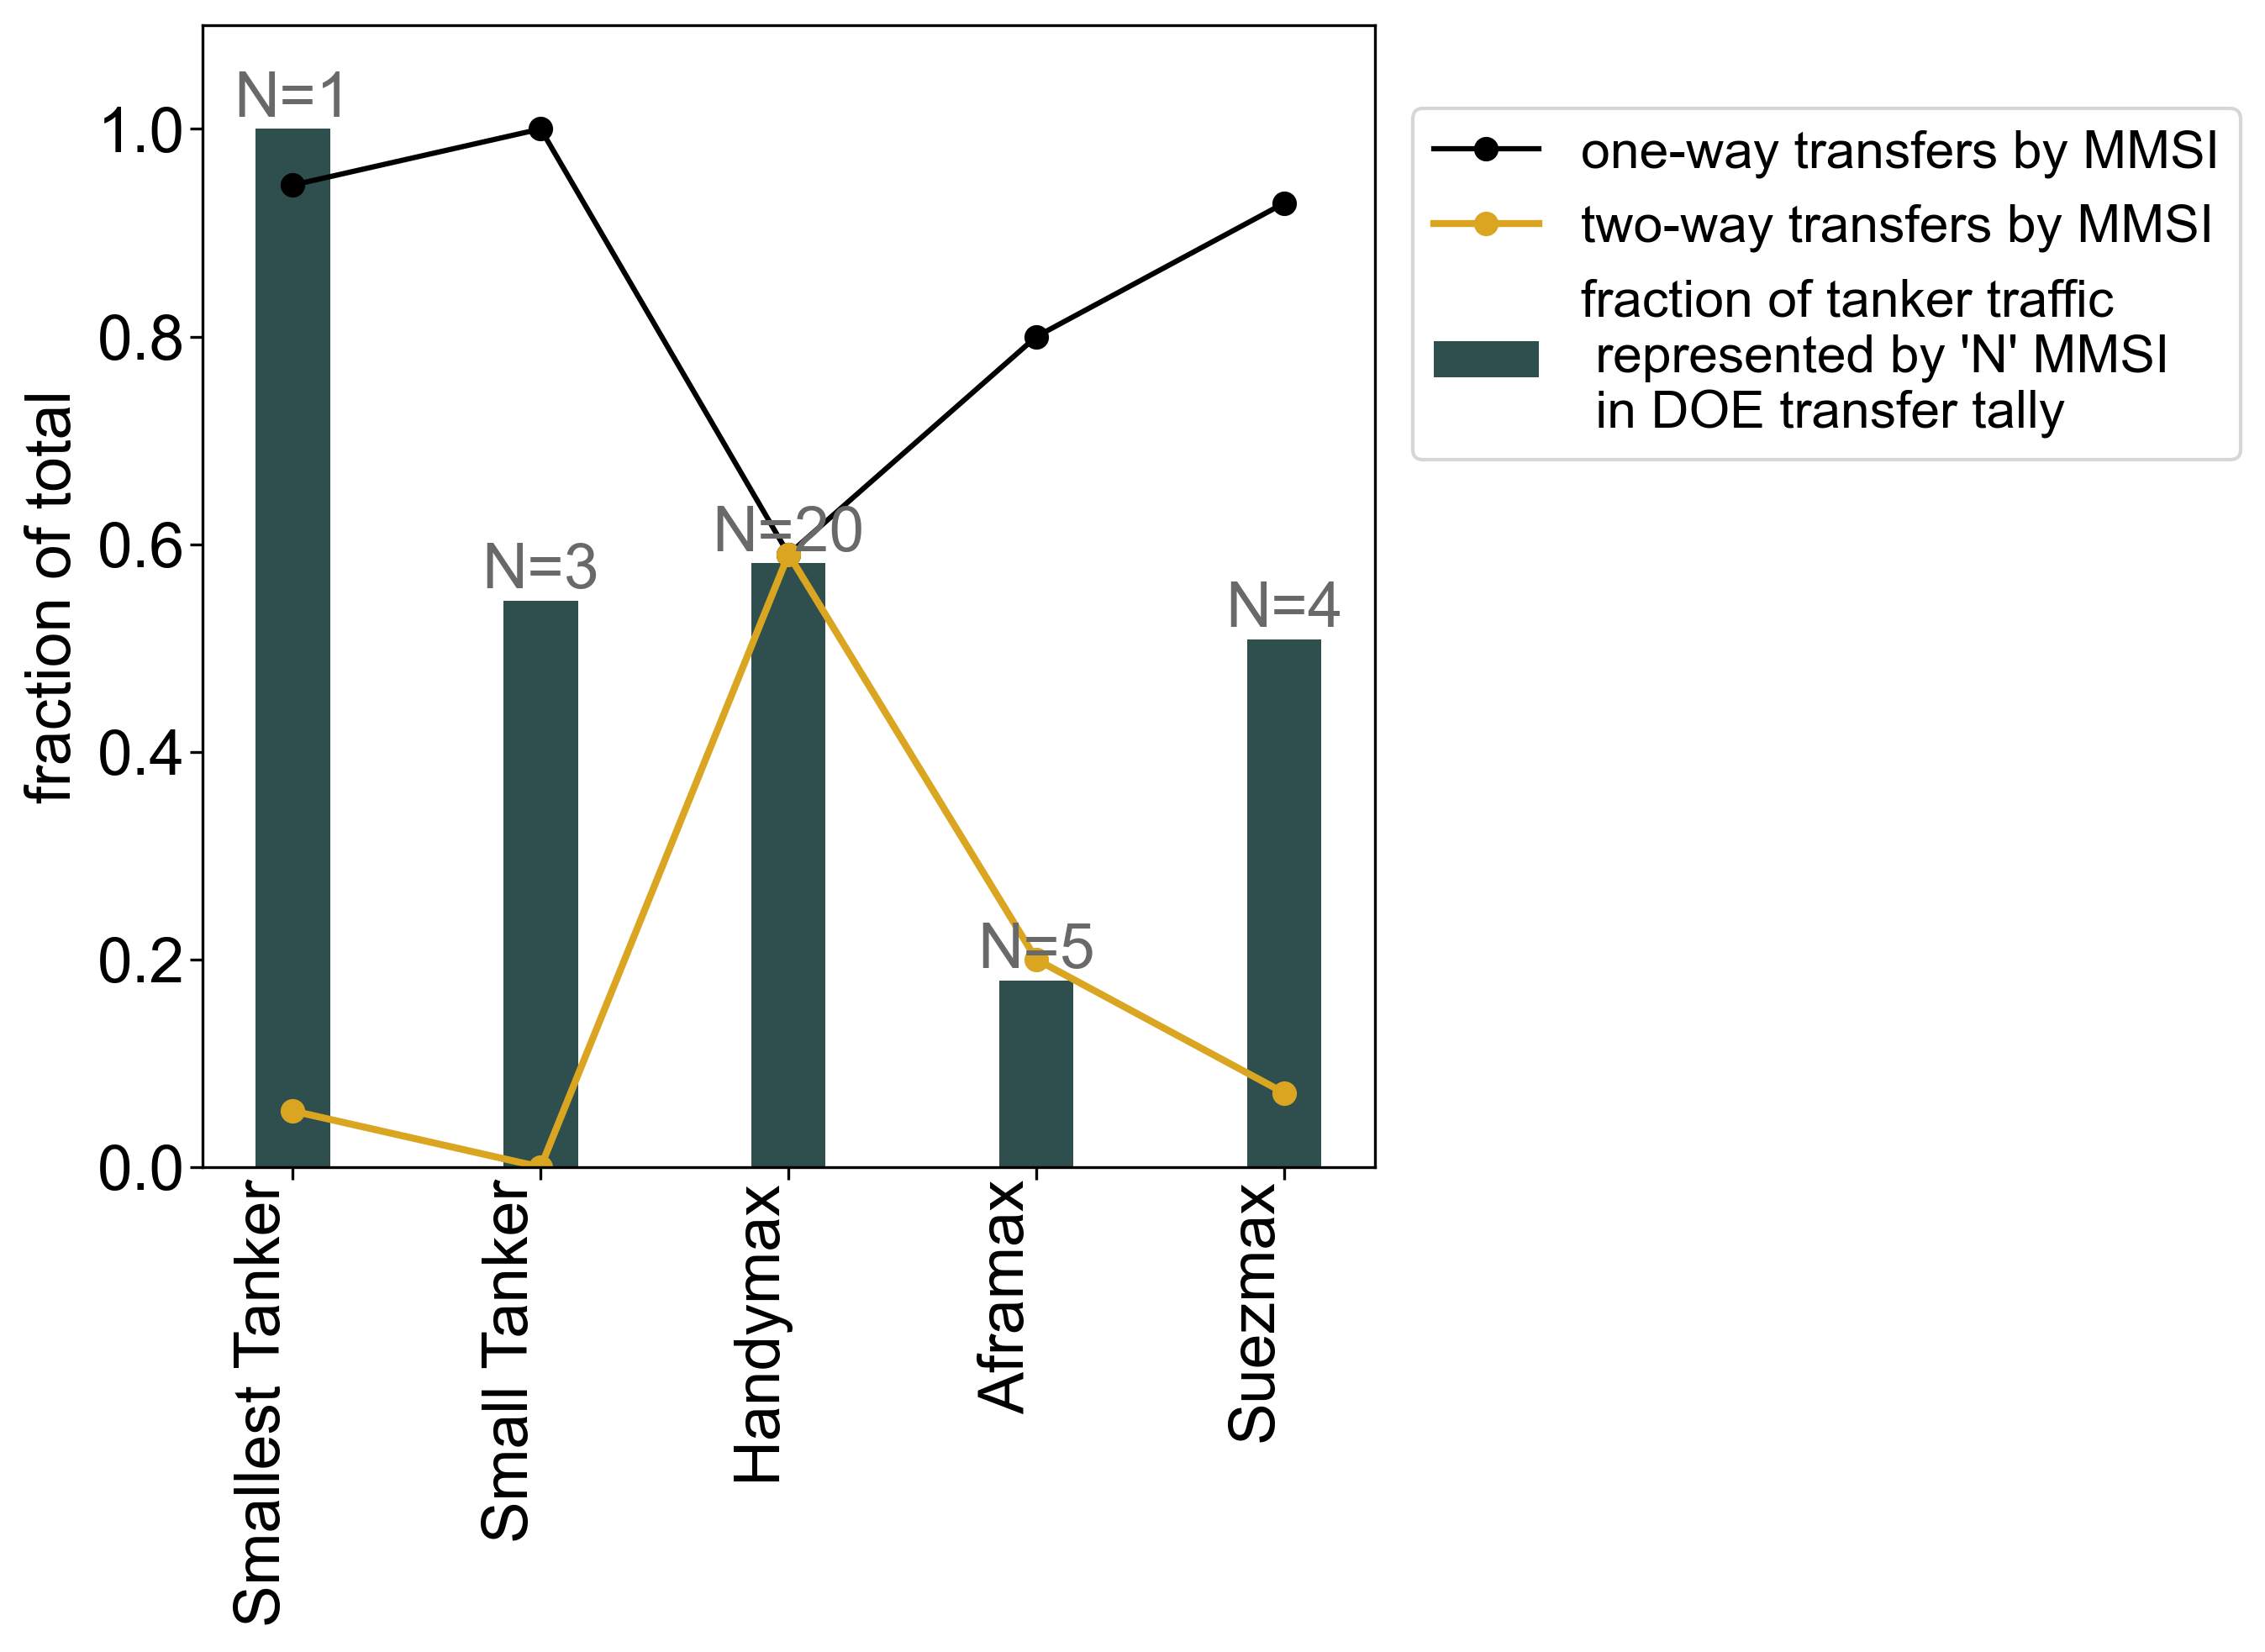

In [35]:
## Shipping behaviors
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))   
ax.plot(ind,one_way,'-o',
          color="black",
          label="one-way transfers by MMSI")
ax.plot(ind,two_way,'-o',
        linewidth=2,
          color="goldenrod",
          label="two-way transfers by MMSI")
ax.bar(ind,percent_traffic,.3,
          color=oil.vesselcolors["tanker"],
          label="fraction of tanker traffic \n represented by 'N' MMSI\n in DOE transfer tally")
ax.set_ylabel('fraction of total')
ax.set_ylim(0,1.1)
ax.set_xticks(ind)
ax.set_xticklabels(size_classes_label, minor=False, rotation=90, ha='right')
# Number of MMSI used in DOE transfer tally
N=[1,3,20,5,4]
for i, v in enumerate(percent_traffic):
    ax.text(i, v, f'N={N[i]}', color="dimgrey",ha='center', va='bottom')
ax.legend(bbox_to_anchor=(1.01, 0.95), loc='upper left')
plt.savefig(graphics_directory/'Tanker_transfers.png')


Total number of MMSI by size class (in QAQC_Tanker....)
** 1 ** Smallest Tanker (< 60 m) vessels
** 19 ** Small Tanker (61 - 150 m) vessels
** 140 ** Handymax (151-200 m) vessels
** 69 ** Aframax (201-250 m) vessels
** 29 ** Suezmax (251-300 m) vessels

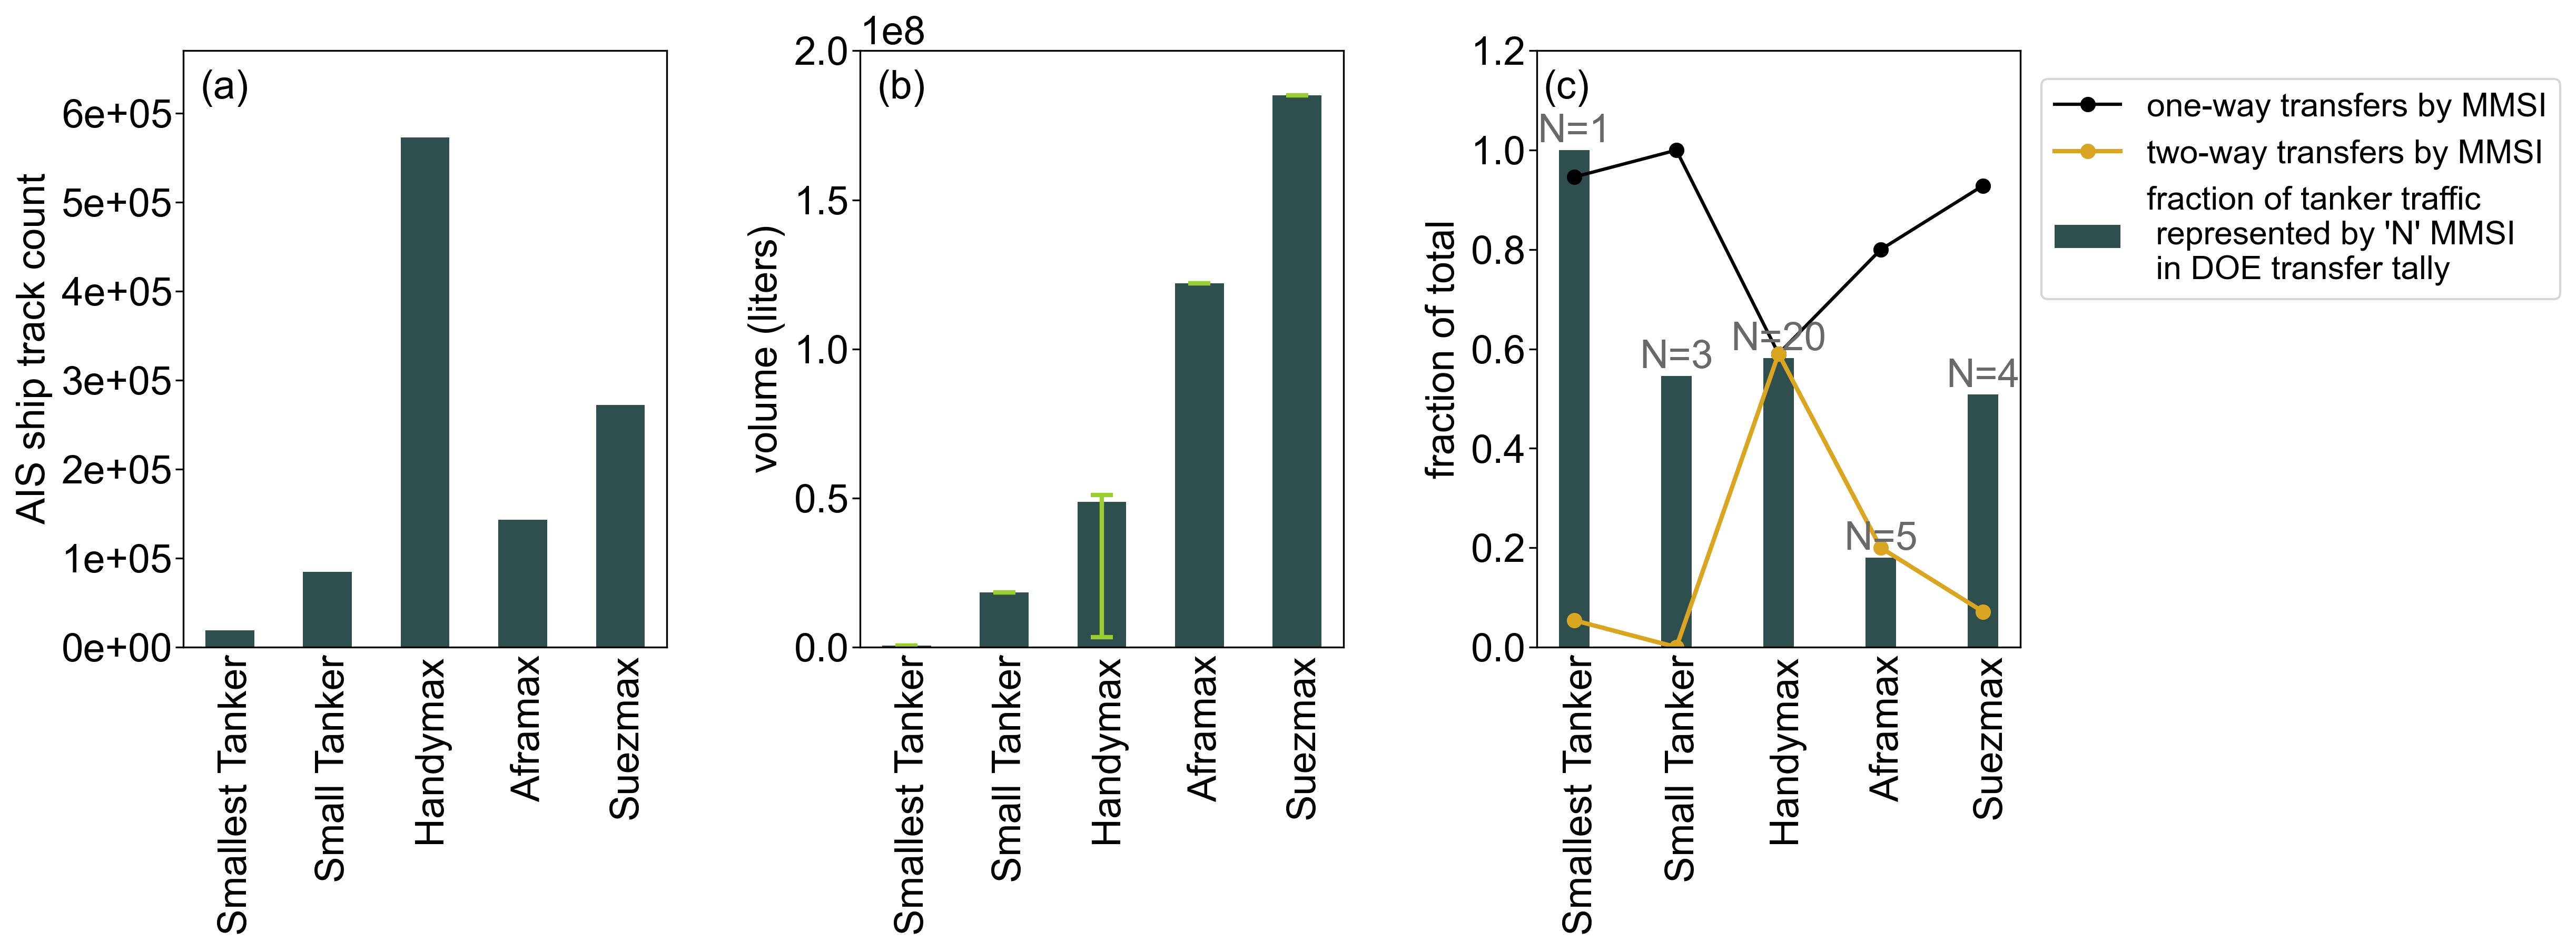

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5),
                       gridspec_kw={
                           'width_ratios': [1, 1,1],
                           'height_ratios': [1],
                       'wspace': 0.4,
                       'hspace': 0.6})   
#width = 0.75 # the width of the bars 
ind = np.arange(len(binned_data))  # the x locations for the groups
ax[0].bar(ind, binned_data, 0.5, color=oil.vesselcolors["tanker"])
ax[0].set_xticks(ind+1/4)
ax[0].set_xticklabels(size_classes_label, minor=False, rotation=90, ha='right')
ax[0].set_ylim(0, 6.7e5)
for ix in [0,1,2]:
    ax[ix].tick_params(axis = "x", which = "both", bottom = False, top = False)
#plt.title('Number of AIS ship tracks in 2018, by tanker size class ')
#plt.xlabel('Tanker size class', rotation=45)
ax[0].set_ylabel('AIS ship track count')
ax[0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

## Cargo capacities for different size classes
tanker_capacities = oil_attrs['vessel_attributes']['tanker']['cargo_capacity'][0:5]
ax[1].bar(ind, tanker_capacities, 0.5, 
          yerr=[[0,0,tanker_capacities[2]-handy_min,0,0],[0,0,handy_max-tanker_capacities[2],0,0]],
          error_kw=dict(ecolor='yellowgreen', lw=2, capsize=5, capthick=2),
          color=oil.vesselcolors["tanker"])
ax[1].set_ylim(0,2e8)
ax[1].set_xticks(ind+1/4)
ax[1].set_xticklabels(size_classes_label, minor=False, rotation=90, ha='right')
ax[1].set_ylabel('volume (liters)')
# transfers
ax[2].plot(ind,one_way,'-o',
          color="black",
          label="one-way transfers by MMSI")
ax[2].plot(ind,two_way,'-o',
        linewidth=2,
          color="goldenrod",
          label="two-way transfers by MMSI")
ax[2].bar(ind,percent_traffic,.3,
          color=oil.vesselcolors["tanker"],
          label="fraction of tanker traffic \n represented by 'N' MMSI\n in DOE transfer tally")
ax[2].set_ylabel('fraction of total')
ax[2].set_ylim(0,1.2)
ax[2].set_xticks(ind+1/4)
ax[2].set_xticklabels(size_classes_label, minor=False, rotation=90, ha='right')
# Number of MMSI used in DOE transfer tally
N=[1,3,20,5,4]
for i, v in enumerate(percent_traffic):
    ax[2].text(i, v, f'N={N[i]}', color="dimgrey",ha='center', va='bottom')
ax[2].legend(bbox_to_anchor=(1.01, 0.98), loc='upper left')
ax[0].text(-.3,0.92*6.7e5,'(a)')
ax[1].text(-.3,0.92*2e8,'(b)')
ax[2].text(-.3,0.92*1.2,'(c)')
plt.savefig(graphics_directory/'Tanker_PingsVolumeTransfers_bySize.png')

In [37]:
np.asarray(oil_attrs['vessel_attributes']['tanker']['handy_capacity']).min()

3402326.5080000004

## Plot location of large spills by oil type and file

In [38]:
# sort the spills by volume
nrows=100
spill_locs_100 = {}
for file_index,file in enumerate(filenames):
    spill_locs = df[file_index].sort_values(
        by="spill_volume",
        ascending=False).reset_index(drop=True)
    # rename oil types to those represented in model runs
    spill_locs['Lagrangian_template'] = spill_locs['Lagrangian_template'].replace(
        oil.fnames, oil.MIDOSSlabels
    )
    # extract the first nrows
    spill_locs_100[file_index] = spill_locs.iloc[:nrows]

In [39]:
spill_locs_byoil = {}
for file_index,file in enumerate(filenames):
    spill_locs_byoil[file_index]={}
    for oil in oils.MIDOSSlabels:
        spill_locs_byoil[file_index]["{0}".format(oil)] = spill_locs_100[file_index][
            spill_locs_100[file_index].Lagrangian_template==oil
        ].sort_values(by='spill_volume')
        len_array = len(spill_locs_byoil[file_index][oil])
        #print(f'{oil}: {len_array}')

NameError: name 'oils' is not defined

In [ ]:
# determine max spill volume across all files
spill_volume_fraction = {}
max_spill_byfile = np.zeros(len(filenames))
for file_index,file in enumerate(filenames):
    max_spill_byfile[file_index] = max(
        spill_locs_100[file_index].spill_volume
    )
max_spill_volume = max(max_spill_byfile)

In [ ]:
for file_index,file in enumerate(filenames):
    # Weight spill volumes by max volume for plotting 
    spill_volume_fraction[file_index] = spill_locs_100[file_index].spill_volume/max_spill_volume 

In [ ]:
[*spill_locs_byoil[file_index]]

In [ ]:
# define axis limits
axlim = np.zeros(4)
axlim[0] = -124.5
axlim[1] = -123.5
axlim[2] = spill_locs.spill_lat.min()
axlim[3] = spill_locs.spill_lat.max()

# oil_colors = [
#     'darkolivegreen',
#     'indigo',
#     'mediumslateblue',
#     'cornflowerblue',
#     'saddlebrown'
# ]
ms = 300

rotated_crs = cartopy.crs.RotatedPole(pole_longitude=120.0, pole_latitude=63.75)
plain_crs = cartopy.crs.PlateCarree()
from cartopy.io import shapereader as shpreader 
%matplotlib inline    
for file_index,file in enumerate(filenames):
    fig,axs = plt.subplots(
        1, 4, figsize=(18, 9), 
        subplot_kw={"projection": rotated_crs, "facecolor": "white"}
    )
    fig.subplots_adjust(hspace=0.5)
    terminal_loc = 0
    for plot_index,oil in enumerate([*spill_locs_byoil[file_index]]):
        spill_volume_fraction[file_index] = spill_locs_byoil[file_index][oil].spill_volume/max_spill_volume
 #       print(plot_index)
        axs[plot_index].add_feature(feature.GSHHSFeature(
            'auto', 
            edgecolor='lightgrey', 
            facecolor='none'
        ), zorder=1)
        scatter_bunker = axs[plot_index].scatter(spill_locs_byoil[file_index][oil].spill_lon, 
               spill_locs_byoil[file_index][oil].spill_lat, 
               s = ms * spill_volume_fraction[file_index],
               #label = spill_volume_fraction['bunker'].values.tolist(),
               color=oil.MIDOSScolors[oil],
               alpha = 0.5,
               edgecolors='grey',
               linewidth=0.7,
               transform=plain_crs,
               zorder=2)
    #     handles, labels = scatter_bunker.legend_elements(prop="sizes", color=oil_colors[1], num=3, alpha=1)
    #     legend = axs[plot_index].legend(handles, labels, loc="upper right", title="volume (liters)")
    #     plt.setp(legend.get_title(),fontsize='xx-large')
        axs[plot_index].set_title(oil)
        axs[plot_index].set_extent(axlim, crs=plain_crs)
    
    axs[0].text(-0.05,0.5,'100 largest spills in ' + filenames[file_index][-6:],
        rotation = 90,
        horizontalalignment='center',
        verticalalignment='center',
        transform = axs[0].transAxes,
        fontsize = 14)
    fig.canvas.draw()
    #fig.tight_layout()

    index += 1
    plt.show()

## Sort spills by oil type and DOE scenarios
- Worst case: Complete discharge of 3.5e7 gallons (1.24 m$^3$)
- Maximum most probable: Largest historical = 2.5e5 gallons (9.5e2 m$^3$)
- Most probable: "Average" spills up to 1e2 gallons (0.4 m$^3$)
---
- Max capacity SuezMax = 1.85e5 m$^3$
- Max capacity ATB = 3.0e4 m$^3$

In [ ]:
liter2m3

In [ ]:
# Convert DOE spill scenarios to m3
spill_case = {}
spill_case['worst']=3.5e7*gal2m3
spill_case['max_likely']=2.5e5*gal2m3
spill_case['most_likely']=1e2*gal2m3

combinedSpillVolume_m3 = liter2m3*df_combined[['spill_volume']]
P1 = len(combinedSpillVolume_m3[combinedSpillVolume_m3.spill_volume >spill_case['worst']])/len(combinedSpillVolume_m3)
P2 = len(
    combinedSpillVolume_m3[
        (combinedSpillVolume_m3.spill_volume <= spill_case['worst']) & 
        (combinedSpillVolume_m3.spill_volume > spill_case['max_likely'])
    ])/len(combinedSpillVolume_m3)
P3 = len(
    combinedSpillVolume_m3[
        (combinedSpillVolume_m3.spill_volume <= spill_case['max_likely']) & 
        (combinedSpillVolume_m3.spill_volume > spill_case['most_likely'])
    ])/len(combinedSpillVolume_m3)
P4 = len(
    combinedSpillVolume_m3[
        combinedSpillVolume_m3.spill_volume <= spill_case['most_likely']
    ])/len(combinedSpillVolume_m3)
percent_spills = {}
percent_spills['gt_worst'] = 100*P1
percent_spills['maxlikely_worst'] = 100*P2 
percent_spills['mostlikely_maxlikely'] = 100*P3
percent_spills['lt_mostlikely'] = 100*P4

print(f'Percent spills above DOE worst scenario: {percent_spills["gt_worst"]:.4f}%') 
print(f'Percent spills between max likely and worst: {percent_spills["maxlikely_worst"]:.2f}%') 
print(f'Percent spills between most likely and max likely: {percent_spills["mostlikely_maxlikely"]:.2f}%') 
print(f'Percent spills less than most likely: {percent_spills["lt_mostlikely"]:.2f}%') 

In [ ]:
P1 = len(combinedSpillVolume_m3[combinedSpillVolume_m3.spill_volume >spill_case['worst']])/len(combinedSpillVolume_m3)
P2 = len(
    combinedSpillVolume_m3[
        (combinedSpillVolume_m3.spill_volume <= spill_case['worst']) & 
        (combinedSpillVolume_m3.spill_volume > spill_case['max_likely'])
                          ]
        )/len(combinedSpillVolume_m3)


In [ ]:
print('DOE spill case volumes [m3]')
spill_case

In [ ]:
fig = plt.figure(1)
ax = fig.add_subplot(111)
n, bins, patches = plt.hist(
    combinedSpillVolume_m3,
    log=True,
    bins=50,
    align='mid'
)
plt.plot((spill_case['worst'], spill_case['worst']),
         (0, 1e5),
         'c',
         label='DOE worst'
        )
plt.xlabel('Volume [m$^3$]')
plt.ylabel('Number of spills')
plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
plt.legend(bbox_to_anchor=(1.4, 1.0),loc=1)
plt.title('All 90,000 monte carlo spills')
plt.savefig(graphics_directory/'numberSpills_by_volume.png',bbox_inches='tight')

## Modify histogram to be more tailored to DOE thresholds

In [ ]:
bins_7 = np.array([0, 1, 1000,5000,10000, 20000,100000,175000])

In [ ]:
fig = plt.figure(1)
ax = fig.add_subplot(111)
n_7, bins_test, patches_7 = plt.hist(
    combinedSpillVolume_m3,
    log=True,
    bins=bins_7,
    align='mid'
)
plt.plot((spill_case['worst'], spill_case['worst']),
         (0, 1e5),
         'c',
         label='DOE worst'
        )
plt.xlabel('Volume [m$^3$]')
plt.ylabel('Number of spills')
plt.setp(ax.get_xticklabels(), ha="right", rotation=45)
plt.legend(bbox_to_anchor=(1.4, 1.0),loc=1)
plt.title('All 90,000 monte carlo spills')
plt.savefig(graphics_directory/'numberSpills_by_volume.png',bbox_inches='tight')

In [ ]:
## write to file spill count by selected 7 bins of spill volume
percent_by_bin = 100*n_7/len(combinedSpillVolume_m3)
Nspills_7 = {
    'Percent spills':[f'{percent:.3f}' for percent in percent_by_bin],
    'Spill volume [m3]':[f'{bins_7[idx]} - {bins_7[idx+1]}' for idx in np.arange(0,len(n_7))]}
 
# Create DataFrame
df = pd.DataFrame(Nspills_7)
 
# Print to file
df.to_csv(graphics_directory/'Spills90K_7bins.csv')

# Let's have a looksi
df

In [ ]:
worst = combinedSpillVolume_m3.loc[combinedSpillVolume_m3.spill_volume<spill_case['worst']]
n, bins, patches = plt.hist(
    worst.spill_volume,
    log=True,
    bins=50
)
plt.plot((spill_case['worst'], spill_case['worst']),
         (0, 1e5),
         'c',
         label='DOE worst')
plt.plot((spill_case['max_likely'], spill_case['max_likely']),
         (0, 1e5),
         'y',
         label='DOE max likely')
plt.xlabel('Volume [m$^3$]')
plt.ylabel('Number of spills')
plt.legend(bbox_to_anchor=(1.45, 1.0),loc=1)
plt.title('Number of spills less than "worst case" scenario')

In [ ]:
df_combined_sorted = {}
df_combined_sorted

## Re-do graphic with previous versions shown

In [ ]:
# gather filenames for difference cases
# ~~~ original ~~~
data_directory = '/Users/rmueller/Data/MIDOSS/monte_carlo/spill_files_terminalgroupings/'
filenames = sorted(glob(os.path.join(data_directory,"*.csv")))
# ~~~ updated ~~~
data_directory = '/Users/rmueller/Data/MIDOSS/monte_carlo/'
filenames_u = sorted(glob(os.path.join(data_directory,"SalishSeaOilSpills_fixbarge_10000_1.csv")))
# ~~~ newest ~~~ 
data_directory = '/Users/rmueller/Data/MIDOSS/monte_carlo/spill_files_mctest/'
filenames_n = sorted(glob(os.path.join(data_directory,"*.csv")))

# create dictionary to tally spills by vessel
df={}
spill_count = {}
spill_volume = {}
# loop through each 10,000 spill file and plot:
fig1 = plt.figure(figsize=(10, 10))
fig2 = plt.figure(figsize=(10, 10))
#1) spill count by vessel type
ax1 = fig1.add_subplot(211)
#2) spill volume by vessel type
ax2 = fig1.add_subplot(212)
for file_index,file in enumerate(filenames):
    print(file_index,file)
    df[file_index] = pd.read_csv(file)
    spill_count[file_index] = {}
    spill_volume[file_index]={}
    # calculate and catalogue spill count
    spill_count[file_index] = df[file_index][
            ['spill_volume','vessel_type']
        ].groupby('vessel_type').count()
    spill_count[file_index] = spill_count[file_index].rename(
        columns = {'spill_volume':'spill_count'}
    )
    # calculate and catalogue spill volume
    spill_volume[file_index] = df[file_index][
            ['spill_volume','vessel_type']
        ].groupby('vessel_type').sum()
    #ax = spill_count[file_index].spill_count[:].plot(label={'File #'file_index})
    ax1.plot(
        spill_count[file_index].spill_count[:],
        '-',
        color = "grey",
    )
    ax2.plot(
        spill_volume[file_index].spill_volume[:],
        '-',
        color = 'grey',
    )
    
for file_index,file in enumerate(filenames_u):
    print(file_index,file)
    df[file_index] = pd.read_csv(file)
    spill_count[file_index] = {}
    spill_volume[file_index]={}
    # calculate and catalogue spill count
    spill_count[file_index] = df[file_index][
            ['spill_volume','vessel_type']
        ].groupby('vessel_type').count()
    spill_count[file_index] = spill_count[file_index].rename(
        columns = {'spill_volume':'spill_count'}
    )
    # calculate and catalogue spill volume
    spill_volume[file_index] = df[file_index][
            ['spill_volume','vessel_type']
        ].groupby('vessel_type').sum()
    #ax = spill_count[file_index].spill_count[:].plot(label={'File #'file_index})
    ax1.plot(
        spill_count[file_index].spill_count[:],
        '-',
        color = "black",
        label='capacity correction',
    )
    ax2.plot(
        spill_volume[file_index].spill_volume[:],
        '-',
        color = 'black',
        label='capacity correction'
    )
    
for file_index,file in enumerate(filenames_n):
    print(file_index,file)
    df[file_index] = pd.read_csv(file)
    spill_count[file_index] = {}
    spill_volume[file_index]={}
    # calculate and catalogue spill count
    spill_count[file_index] = df[file_index][
            ['spill_volume','vessel_type']
        ].groupby('vessel_type').count()
    spill_count[file_index] = spill_count[file_index].rename(
        columns = {'spill_volume':'spill_count'}
    )
    # calculate and catalogue spill volume
    spill_volume[file_index] = df[file_index][
            ['spill_volume','vessel_type']
        ].groupby('vessel_type').sum()
    #ax = spill_count[file_index].spill_count[:].plot(label={'File #'file_index})
    ax1.plot(
        spill_count[file_index].spill_count[:],
        '-',
        label=f'#{file_index}',
    )
    ax2.plot(
        spill_volume[file_index].spill_volume[:],
        '-',
        label=f'#{file_index}'
    )
    
ax1.legend(bbox_to_anchor=(1.12, 1.0),loc=1)
ax2.legend(bbox_to_anchor=(1.12, 1.0),loc=1)
ax1.set_title('Number of spills by vessel type for every 10,000 spills .csv file')
ax2.set_title('Volume of spills by vessel type for every 10,000 spills .csv file')
fig3 = plt.gcf()
plt.draw()
fig3.savefig(graphics_directory/'spills_by_vesseltype_comparison.png',bbox_inches='tight')


### Hypothesis: The spread in ATB spill volume among 10,000 run files is smaller than the other tank vessels because:
- the number of spills is much smaller than the barge category
- the maximum cargo capacity is an order of magnitude smaller than the tanker category

#### Plot ratio of spill volume to cargo capacity to test this hypothesis

In [ ]:
cargo_spills = {}
for vessel in ['tanker','atb','barge']:
    cargo_spills[vessel] = df_combined.loc[
        (df_combined.fuel_cargo == 'cargo') &
        (df_combined.vessel_type == vessel),
        ['cargo_capacity', 'spill_volume', 'vessel_type']
    ]
    cargo_spills[vessel]['ratio'] = cargo_spills[vessel]['spill_volume']/cargo_spills[vessel]['cargo_capacity']

cargo_spills['tanker'].head()

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for idx,vessel in enumerate(['tanker','atb','barge']):
    percent_bins = np.arange(0, 1, 0.1)
    cargo_spills[vessel]['ratio'].hist(ax=axs[idx],bins=percent_bins);
    axs[idx].set_xlabel('Fraction spilled');
    axs[idx].set_title(vessel)

In [ ]:
cargo_spills[vessel]['ratio']

### Evaluate the ATB, barge and tanker size classes

In [ ]:
vessel_sizes={}

fig,axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
histbins = {}
histbins['atb'] = np.arange(20,210,10) 
histbins['barge'] = np.arange(0,100,10) 
histbins['tanker'] = np.arange(25,300,25) 

for idx_vessel,vessel in enumerate(['atb','barge','tanker']):
    # count number of spills by size class
    vessel_sizes[vessel] = df_combined.loc[
        (df_combined.vessel_type == vessel),
        ['vessel_len', 'spill_volume','cargo_capacity','fuel_capacity']
    ]
    # raw print for perspective
    #print(vessel_sizes[vessel]['count'])
    # plot histograms of number of spills and volume spilled by size class  
    vessel_sizes[vessel].vessel_len.hist(ax=axs[0,idx_vessel],bins=histbins[vessel]);
    vessel_sizes[vessel].vessel_len.hist(ax=axs[1,idx_vessel], bins=histbins[vessel], weights=vessel_sizes[vessel].spill_volume);
    axs[0,0].set_ylabel('Number of vessels by length');
    axs[1,0].set_ylabel('Spill Volume (liters)');
    axs[0,idx_vessel].set_title(vessel)

In [ ]:
# print values for publication
#print(vessel_sizes['atb'].vessel_len(vessel_sizes[vessel].vessel_len < 50).count())
atb_lt_50 = vessel_sizes['atb']['vessel_len'].loc[
    vessel_sizes['atb']['vessel_len'] < 50
].count()
atb_130to210 = vessel_sizes['atb']['vessel_len'].loc[
    (vessel_sizes['atb']['vessel_len'] > 130) & 
    (vessel_sizes['atb']['vessel_len'] < 210)
].count()
print('---------  Monte Carlo (before length adjustment) --------------')
print(f'ATB count (< 50m): {atb_lt_50}')
print(f'ATB count (130 - 210 m):{atb_130to210}')
print(f'ATB ratio (< 50 m)/(130 - 210 m):{atb_lt_50/atb_130to210}')

In [ ]:
# compare monte-carlo results to AIS

#~~~ atb traffic ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# fuel and cargo capacity information
# B: "FREQUENCY"
# C: "LENGTH"

atb_df = pd.read_excel(
    '/Users/rmueller/Data/MIDOSS/marine_transport_data/Origin_Destination_Analysis.xlsx',
    sheet_name='Vessel Length', 
    usecols='A,B,C',
    skiprows=2
)

atb_seglen = pd.read_excel(
    '/Users/rmueller/Data/MIDOSS/marine_transport_data/Origin_Destination_Analysis.xlsx',
    sheet_name='Frequency of AIS Pings', 
    usecols='A,B,C',
    skiprows=1
)
# set MMSI column to same name
atb_seglen = atb_seglen.rename(columns={"ATB MMSI":"MMSI"})
# join sheets
atb_df = pd.merge(
    left=atb_df, 
    right=atb_seglen, 
    on = "MMSI",
    how='left'
)

# < 50 m ATBs
atb_lt_50_ais = atb_df.loc[
   ( atb_df['LENGTH'] < 50),
    ['Number of vessel tracks',"Median segment length (km)"]
]
# scale number vessel tracks by segment lengths and sum 
atb_lt_50_ais_sum = (
    atb_lt_50_ais['Number of vessel tracks']*\
    atb_lt_50_ais["Median segment length (km)"]/\
    atb_lt_50_ais["Median segment length (km)"].mean()
).sum()

# Repeat fo 130-210 m ATBs
atb_130to210_ais = atb_df.loc[
    ( atb_df['LENGTH'] > 130) & 
    ( atb_df['LENGTH'] < 210),
    ['Number of vessel tracks',"Median segment length (km)"]
]
atb_130to210_ais_sum = (
    atb_130to210_ais['Number of vessel tracks']*\
    atb_130to210_ais["Median segment length (km)"]/\
    atb_130to210_ais["Median segment length (km)"].mean()
).sum()
print('---------  AIS (counts weighted by segment lengths) --------------')
print(f'ATB count (< 50m): {atb_lt_50_ais_sum}')
print(f'ATB count (130 - 210 m):{atb_130to210_ais_sum}')
print(f'ATB ratio (< 50 m)/(130 - 210 m):{atb_lt_50_ais_sum/atb_130to210_ais_sum}')

In [ ]:
atb_df.head()

## Review oil_attribution.yaml and assumptions on barge and ATB oil attribution using voyage dataset

In [ ]:
from monte_carlo_utils import make_bins, get_bin, place_into_bins, clamp
random_seed=None
# Initialize PCG-64 random number generator
random_generator = np.random.default_rng(random_seed)


# after reviewing the oil attribution file, I see that I have the weights and bins set to the ATB category
# load oil_attribution file to review specifications for ATBs and barges. 

# test the random generator 
cargo_weight = (
    oil_attrs['vessel_attributes']['barge']
    ['cargo_capacity_probability']
)
cargo_capacity_bin_centers =  (
    oil_attrs['vessel_attributes']['barge']
    ['cargo_capacity_bin_centers'] 
)
cargo_capacity = random_generator.choice(
    cargo_capacity_bin_centers, 
    p = cargo_weight
)

In [ ]:
(oil_attrs["vessel_attributes"]["atb"]["min_cargo"] +  20810153.33)/ 236476.57

In [ ]:
print('cargo weights\n',cargo_weight)
#print()

In [ ]:
oil_attrs['vessel_attributes']['barge']

## Take-away: Vessel lengths varry in monte-carlo

In [ ]:
vessel_sizes['barge']

### Plot location of oil spills by vessel types and oil types

In [ ]:
# calculate maximum spill to use for weighting size of scatter dots
max_spill_volume = df_combined.spill_volume.max()

In [ ]:
scatter_oil = {}
spill_locs_byoil = {}
spill_volume_fraction = {}

for vessel in vessel_types:
    spill_locs_byoil[vessel] = {}
    spill_volume_fraction[vessel] = {}
    for oil in oil_labels:
        spill_locs_byoil[vessel][oil] = df_combined.loc[
            (df_combined.vessel_type == vessel) &
            (df_combined.Lagrangian_template == oil),
            ['spill_lat', 'spill_lon', 'spill_volume']
        ]
        spill_volume_fraction[vessel][oil] = spill_locs_byoil[vessel][oil].spill_volume/max_spill_volume


In [ ]:
for idx_vessel, vessel in enumerate(vessel_types):
    for idx_oil,oil in enumerate(oil_labels):
        test = np.log10(ms * spill_volume_fraction[vessel][oil])

In [ ]:
## rotated_crs = cartopy.crs.RotatedPole(pole_longitude=120.0, pole_latitude=63.75)
plain_crs = cartopy.crs.PlateCarree()
rotated_crs = cartopy.crs.RotatedPole(pole_longitude=120.0, pole_latitude=63.75)

fs = 20
ms = 300
fs_legend = 12
fs_legend_title = 16

%matplotlib inline    

terminal_loc = 0
vessel='tanker'
idx_vessel = 0

fig, axs = plt.subplots(
    nrows=len(vessel_types), ncols=len(oil_labels), sharex=True, sharey=False, figsize=(50, 100),
    subplot_kw={"projection": rotated_crs, "facecolor": "white"}
)
gs1 = gridspec.GridSpec(4, 4)
gs1.update(wspace=0.025, hspace=0.00) # set the spacing between axes.

for idx_vessel, vessel in enumerate(vessel_types):
    for idx_oil,oil in enumerate(oil_labels):    
        print(idx_oil,oil)

        axs[idx_vessel,idx_oil].add_feature(feature.GSHHSFeature('intermediate', edgecolor='k', facecolor='#8b7765'),zorder=1)
        axs[idx_vessel,idx_oil].scatter(
           spill_locs_byoil[vessel][oil].spill_lon, 
           spill_locs_byoil[vessel][oil].spill_lat, 
           s = ms * spill_volume_fraction[vessel][oil],
           label = spill_volume_fraction[vessel][oil].values.tolist(),
           color=oil_colors[idx_oil],
           alpha = 1.0,
           edgecolors='grey',
           linewidth=0.7,
           transform=plain_crs,
           zorder=2
        )
        axs[idx_vessel,idx_oil].set_title(oil, fontsize=32)
        axs[idx_vessel, 0].set_ylabel(vessel, color='black') #why isn't this working?!
        axs[idx_vessel,idx_oil].set_extent([-123.95, -123.95, 46.6, 50.89])
        axs[idx_vessel,idx_oil].set_aspect('equal')
    plt.text(-0.1,0.5,vessel,horizontalalignment='center',
            verticalalignment='center', transform = axs[idx_vessel,0].transAxes,
            rotation=90,fontsize=36)
fig.canvas.draw()
plt.show()
#fig.savefig(graphics_directory/'monte_carlo_spills_100000.pdf')
fig.savefig(graphics_directory/'monte_carlo_spills_100000.jpeg')

### Number of spills and spill volume by oil type

In [ ]:
# create dictionary to tally spills by vessel
spill_count_byoil = {}
spill_volume_byoil = {}
# loop through each 10,000 spill file and plot:
fig1 = plt.figure(figsize=(10, 10))
fig2 = plt.figure(figsize=(10, 10))
#1) spill count by vessel type
ax1 = fig1.add_subplot(211)
#2) spill volume by vessel type
ax2 = fig1.add_subplot(212)
for file_index,file in enumerate(filenames):
    spill_count_byoil[file_index] = {}
    spill_volume_byoil[file_index] = {}
    # calculate and catalogue spill count
    spill_count_byoil[file_index] = df[file_index][
            ['spill_volume','Lagrangian_template']
        ].groupby('Lagrangian_template').count()
    spill_count_byoil[file_index] = spill_count_byoil[file_index].rename(
        columns = {'spill_volume':'spill_count'}
    )
    # calculate and catalogue spill volume
    spill_volume_byoil[file_index] = df[file_index][
            ['spill_volume','Lagrangian_template']
        ].groupby('Lagrangian_template').sum()
    ax1.plot(
        spill_count_byoil[file_index].spill_count[:],
        '-',
        label=f'#{file_index}',
    )
    ax2.plot(
        spill_volume_byoil[file_index].spill_volume[:],
        '-',
        label=f'#{file_index}'
    )
ax1.legend(bbox_to_anchor=(1.12, 1.0),loc=1)
ax2.legend(bbox_to_anchor=(1.12, 1.0),loc=1)
ax1.set_title('Number of spills by oil type for every 10,000 spills .csv file')
ax2.set_title('Volume of spills by oil type for every 10,000 spills .csv file')
ax1.set_ylabel('spill count')
ax2.set_ylabel('spill volume (liters x 1e9)')

## plot spill volume by fuel type for tank traffic

In [ ]:
# create dictionary to tally spills by vessel
spill_count_byoil_vessel = {}
spill_volume_byoil_vessel = {}
# loop through each 10,000 spill file and plot:
fig1 = plt.figure(figsize=(10, 10))
fig2 = plt.figure(figsize=(10, 10))
#1) spill count by vessel type
ax1 = fig1.add_subplot(211)
#2) spill volume by vessel type
ax2 = fig1.add_subplot(212)
for vessel in ['tanker', 'atb', 'barge']:
    spill_count_byoil_vessel[vessel] = df_combined.loc[
       (df_combined.vessel_type == vessel),
        ['spill_volume','Lagrangian_template']
    ].groupby('Lagrangian_template').count()
    spill_count_byoil_vessel[vessel] = spill_count_byoil_vessel[vessel].rename(
        columns = {'spill_volume':'spill_count'}
    )
    # calculate and catalogue spill volume
    spill_volume_byoil_vessel[vessel] = df_combined.loc[
        (df_combined.vessel_type == vessel),
        ['spill_volume','Lagrangian_template']
    ].groupby('Lagrangian_template').sum()
    ax1.plot(
        spill_count_byoil_vessel[vessel].spill_count[:],
        '-',
        label=vessel,
    )
    ax2.plot(
        spill_volume_byoil_vessel[vessel].spill_volume[:],
        '-',
        label=vessel,
    )

ax1.legend(bbox_to_anchor=(1.12, 1.0),loc=1)
ax2.legend(bbox_to_anchor=(1.12, 1.0),loc=1)
ax1.set_title('Number of Cargo and Fuel spills by oil type for every 10,000 spills .csv file')
ax2.set_title('Volume of Cargo and Fuel spills by oil type for every 10,000 spills .csv file')
ax2.tick_params('x',labelrotation=45)
#ax1.set_xticklabels(['akns', 'bunker', 'diesel', 'dilbit', 'gas', 'jet', 'other'],fontsize=14)
#ax2.set_xticklabels(['akns', 'bunker', 'diesel', 'dilbit', 'gas', 'jet', 'other'],fontsize=14)
ax1.set_ylabel('spill count', fontsize=14)
ax2.set_ylabel('spill volume (liters x 1e10)', fontsize=14)

## Evaluate monte-carlo representation of tank traffic by cargo- and fuel-capacities

In [ ]:
# create a dataframe with zero transfers
tanker_mc100k = pd.DataFrame()
atb_mc100k = pd.DataFrame()
barge_mc100k = pd.DataFrame()

# Loop through files and add transfers to "transfers" for each facility
for fn in filenames:
    df = pd.read_csv(fn)
    
    # rename mc terminals to match DOE
    df['vessel_dest'] = df['vessel_dest'].replace(
        ['Marathon Anacortes Refinery (formerly Tesoro)'], 'Andeavor Anacortes Refinery (formerly Tesoro)'
    )
    df['vessel_origin'] = df['vessel_origin'].replace(
        ['Marathon Anacortes Refinery (formerly Tesoro)'],'Andeavor Anacortes Refinery (formerly Tesoro)'
    )

    # for imports
    tanker = df.loc[
        (df.vessel_type == 'tanker'),
        ['cargo_capacity', 'fuel_capacity']
    ]
    atb = df.loc[
        (df.vessel_type == 'atb'),
        ['cargo_capacity', 'fuel_capacity']
    ]
    barge = df.loc[
        (df.vessel_type == 'barge'),
        ['cargo_capacity', 'fuel_capacity']
    ]
    tanker_mc100k = pd.concat([tanker_mc100k, tanker])
    atb_mc100k = pd.concat([atb_mc100k, atb])
    barge_mc100k = pd.concat([barge_mc100k, barge])

In [ ]:
tanker_mc100k.shape

In [ ]:
tanker_mc100k.head(5)

In [ ]:
print('--- TANKER CARGO VOLUMES ---')
print(f'Min tanker capacity: {tanker_mc100k.cargo_capacity.min():.2e} liters')
print(f'Max tanker capacity: {tanker_mc100k.cargo_capacity.max():.2e} liters')
print('Expected range: 8e06 liters (Small Tanker,< 150 m) to ~2e08 liters (SuezMax, 287 m)')
print('--- ATB CARGO VOLUMES---')
print(f'Min atb capacity: {atb_mc100k.cargo_capacity.min():.2e} liters')
print(f'Max atb capacity: {atb_mc100k.cargo_capacity.max():.2e} liters')
print('Expected range: 4e06 liters (Island Trader)  to 3e07 liters (Kirby 185-01) ')
print('--- BARGE CARGO VOLUMES ---')
print(f'Min barge capacity: {barge_mc100k.cargo_capacity.min():.2e} liters')
print(f'Max barge capacity: {barge_mc100k.cargo_capacity.max():.2e} liters')
print('Expected range: 1.5e06 liters  to 3.2e07 liters ')

In [ ]:
fig, axs = plt.subplots(1, 1,figsize=(10,5))
df.loc[
    (df.vessel_type == 'tanker'),
    ['vessel_mmsi', 'cargo_capacity']
].groupby('vessel_mmsi').count().plot(ax=axs,kind = "bar")
axs.legend('')
axs.set_ylabel('Number of spills')
axs.set_title('Tanker spill by MMSI, based on 100,000 monte carlo spills')

fig, axs = plt.subplots(1, 1,figsize=(10,5))
df.loc[
    (df.vessel_type == 'atb'),
    ['vessel_mmsi', 'cargo_capacity']
].groupby('vessel_mmsi').count().plot(ax=axs,kind = "bar")
axs.legend('')
axs.set_ylabel('Number of spills')
axs.set_title('ATB spill by MMSI, based on 100,000 monte carlo spills')

fig, axs = plt.subplots(1, 1,figsize=(10,5))
df.loc[
    (df.vessel_type == 'barge'),
    ['vessel_mmsi', 'cargo_capacity']
].groupby('vessel_mmsi').count().plot(ax=axs,kind = "bar")
axs.legend('')
axs.set_ylabel('Number of spills')
axs.set_title('barge spill by MMSI, based on 100,000 monte carlo spills')